In [1]:
# establish a connection with coingGecko API and fetch live prices for BTC and Ethereum

#fetch the top 10 cryptos by market cap
#fetch the top 10 cryptos by volume in last 24 hours

#fetch  historical crypto prices for BTC and Ethereum
# get live crypto prices for the top 5 crypto currencies

#calculate teh volume, volatility, market cap of various coins and pick the top 5 + 5 other outliers above a certain market cap
# fetch last 3 months historic data for ehteremum 
# charts for the above

# run a simple moving average trading algo on ethereum on last 3 months data
#calcualte the returns of the above strategy
#compare it with overall returns that ETH would have given anyways 


# these are for later 
# repeat the above for 5 years of daily data 
# repeat the above for BTC
# moudlarise the above and run on 3 more currencies: possibly MATIC, RIPPLE, Algorand, etc. 

# for much later
# visualise the strategy on a chart 

CoinGecko API docs are here https://www.coingecko.com/en/api/documentation

- Connect to pycoingecko, pandas and other libs needed
- I have created a vritual environment for this project
- I have also played around in postman in the coingecko collection to see how the API behaves
- I have notes on pandas in the notebook as well as in onenote under cryptotrading project under python and data analysis- so be sure to check both the notes and links directly in the notebook as well as teh one note notes to quickly review pandas, and many other learnings 

In [452]:
import pandas as pd
import json 
import matplotlib.pyplot as plt
import seaborn as sns
import random
import datetime as dt

In [3]:
from pycoingecko import CoinGeckoAPI # API docs are here: https://www.coingecko.com/en/api/documentation 
cg = CoinGeckoAPI()

### Establish a connection with coingGecko API and fetch live prices for BTC and Ethereum

In [4]:
cg.get_price(ids=['bitcoin','ethereum'], vs_currencies='usd')

{'bitcoin': {'usd': 25878}, 'ethereum': {'usd': 1733.05}}

### Fetch the top 10 cryptos by market cap

In [5]:
cg.get_coins_markets(vs_currency='usd') # get market data in USD 

[{'id': 'bitcoin',
  'symbol': 'btc',
  'name': 'Bitcoin',
  'image': 'https://assets.coingecko.com/coins/images/1/large/bitcoin.png?1547033579',
  'current_price': 25878,
  'market_cap': 502072361379,
  'market_cap_rank': 1,
  'fully_diluted_valuation': 543420166783,
  'total_volume': 8666475772,
  'high_24h': 26047,
  'low_24h': 25792,
  'price_change_24h': 3.53,
  'price_change_percentage_24h': 0.01366,
  'market_cap_change_24h': 25541143,
  'market_cap_change_percentage_24h': 0.00509,
  'circulating_supply': 19402150.0,
  'total_supply': 21000000.0,
  'max_supply': 21000000.0,
  'ath': 69045,
  'ath_change_percentage': -62.52352,
  'ath_date': '2021-11-10T14:24:11.849Z',
  'atl': 67.81,
  'atl_change_percentage': 38059.46415,
  'atl_date': '2013-07-06T00:00:00.000Z',
  'roi': None,
  'last_updated': '2023-06-14T18:42:02.142Z'},
 {'id': 'ethereum',
  'symbol': 'eth',
  'name': 'Ethereum',
  'image': 'https://assets.coingecko.com/coins/images/279/large/ethereum.png?1595348880',
  'cu

In [6]:
current_market_data = pd.DataFrame(cg.get_coins_markets(vs_currency='usd')) # get the json into a pd dataframe

In [7]:
# explore the data frame
current_market_data.shape

(100, 26)

In [8]:
current_market_data.head(10).T

0   
id                                                                          bitcoin  \
symbol                                                                          btc   
name                                                                        Bitcoin   
image                             https://assets.coingecko.com/coins/images/1/la...   
current_price                                                               25878.0   
market_cap                                                             502072361379   
market_cap_rank                                                                   1   
fully_diluted_valuation                                              543420166783.0   
total_volume                                                           8666475772.0   
high_24h                                                                    26047.0   
low_24h                                                                     25792.0   
price_change_24h                                                               3.53   
price_change_percentage_24h                                                 0.01366   
market_cap_change_24h                                                    25541143.0   
market_cap_change_percentage_24h                                            0.00509   
circulating_supply                                                       19402150.0   
total_supply                                                             21000000.0   
max_supply                                                               21000000.0   
ath                                                                         69045.0   
ath_change_percentage                                                     -62.52352   
ath_date                                                   2021-11-10T14:24:11.849Z   
atl                                                                           67.81   
atl_change_percentage                                                   38059.46415   
atl_date                                                   2013-07-06T00:00:00.000Z   
roi                                                                            None   
last_updated                                               2023-06-14T18:42:02.142Z   

                                                                                  1   
id                                                                         ethereum  \
symbol                                                                          eth   
name                                                                       Ethereum   
image                             https://assets.coingecko.com/coins/images/279/...   
current_price                                                               1733.05   
market_cap                                                             208314681300   
market_cap_rank                                                                   2   
fully_diluted_valuation                                              208314681300.0   
total_volume                                                           4700185083.0   
high_24h                                                                    1749.65   
low_24h                                                                     1727.23   
price_change_24h                                                          -7.251241   
price_change_percentage_24h                                                -0.41667   
market_cap_change_24h                                             -993467577.051697   
market_cap_change_percentage_24h                                           -0.47464   
circulating_supply                                                 120224090.534003   
total_supply                                                       120224090.534003   
max_supply                                                                      NaN   
ath                                                                         487

In [9]:
#columns we are interested in 
#"symbol", "name","current_price","market_cap","total_volume", "ath","ath_change_percentage"
## what is volume? how to read candlestick chart? what are top indicatros that traders use to predict direction/momentum?

In [10]:
current_market_data.columns

Index(['id', 'symbol', 'name', 'image', 'current_price', 'market_cap',
       'market_cap_rank', 'fully_diluted_valuation', 'total_volume',
       'high_24h', 'low_24h', 'price_change_24h',
       'price_change_percentage_24h', 'market_cap_change_24h',
       'market_cap_change_percentage_24h', 'circulating_supply',
       'total_supply', 'max_supply', 'ath', 'ath_change_percentage',
       'ath_date', 'atl', 'atl_change_percentage', 'atl_date', 'roi',
       'last_updated'],
      dtype='object')

In [11]:
current_market_data.dtypes

id                                   object
symbol                               object
name                                 object
image                                object
current_price                       float64
market_cap                            int64
market_cap_rank                       int64
fully_diluted_valuation             float64
total_volume                        float64
high_24h                            float64
low_24h                             float64
price_change_24h                    float64
price_change_percentage_24h         float64
market_cap_change_24h               float64
market_cap_change_percentage_24h    float64
circulating_supply                  float64
total_supply                        float64
max_supply                          float64
ath                                 float64
ath_change_percentage               float64
ath_date                             object
atl                                 float64
atl_change_percentage           

In [12]:
current_market_data.describe()

current_price    market_cap  market_cap_rank  fully_diluted_valuation   
count   1.000000e+02  1.000000e+02       100.000000             9.400000e+01  \
mean    6.445253e+02  1.044462e+10        50.500000             1.274448e+10   
std     3.650568e+03  5.460279e+10        29.011492             6.024587e+10   
min     5.359550e-07  3.451530e+08         1.000000             3.894797e+08   
25%     3.807400e-01  5.089979e+08        25.750000             6.538490e+08   
50%     9.999400e-01  7.417302e+08        50.500000             1.226536e+09   
75%     8.070000e+00  2.239662e+09        75.250000             4.842975e+09   
max     2.589800e+04  5.020724e+11       100.000000             5.434202e+11   

       total_volume      high_24h       low_24h  price_change_24h   
count  1.000000e+02  1.000000e+02  1.000000e+02        100.000000  \
mean   3.870551e+08  6.487196e+02  6.418878e+02          0.433898   
std    1.725529e+09  3.671714e+03  3.637325e+03          4.415599   
min    1.285800e+02  5.407710e-07  5.344730e-07         -8.754012   
25%    7.563374e+06  3.847035e-01  3.729540e-01         -0.001312   
50%    2.779806e+07  1.003500e+00  9.968815e-01          0.001553   
75%    7.614896e+07  8.165000e+00  7.975000e+00          0.052312   
max    1.418913e+10  2.604700e+04  2.579600e+04         36.330000   

       price_change_percentage_24h  market_cap_change_24h   
count                   100.000000           1.000000e+02  \
mean                      0.741187          -2.373362e+06   
std                       2.638008           1.770324e+08   
min                      -6.974710          -9.934676e+08   
25%                      -0.222885          -3.262835e+06   
50%                       0.462965           2.206854e+06   
75%                       1.680380           1.272721e+07   
max                      16.086100           1.113160e+09   

       market_cap_change_percentage_24h  circulating_supply  total_supply   
count                        100.000000        1.000000e+02  9.400000e+01  \
mean                           0.422758        1.987456e+13  2.595178e+13   
std                            2.702207        1.185100e+14  1.500623e+14   
min                           -7.178630        1.566277e+05  1.566277e+05   
25%                           -0.424308        1.190834e+08  1.694202e+08   
50%                            0.230735        8.663036e+08  1.005705e+09   
75%                            1.404765        4.496706e+09  9.902560e+09   
max                           16.218550        9.514217e+14  9.999894e+14   

         max_supply           ath  ath_change_percentage           atl   
count  5.800000e+01    100.000000             100.000000  1.000000e+02  \
mean   2.469302e+13   1776.333307             -75.369907  8.919240e+01   
std    1.403102e+14   9838.855894              26.222597  3.952765e+02   
min    1.566277e+05      0.000003             -99.999920  5.636600e-11   
25%    2.009951e+08      1.680000             -94.033912  2.733647e-02   
50%    1.000000e+09      9.120000             -87.342440  3.642655e-01   
75%    9.429902e+09    103.107500             -67.079442  9.767912e-01   
max    9.900000e+14  70643.000000              -4.384880  3.139170e+03   

       atl_change_percentage  
count           1.000000e+02  
mean            1.393806e+05  
std             1.203133e+06  
min             2.155300e-01  
25%             5.595463e+01  
50%             3.362114e+02  
75%             3.596624e+03  
max             1.201992e+07

In [13]:
current_market_data.sort_values(by="market_cap", ascending=False)[0:10] # grab the top 10 cyptos by market cap

id symbol               name   
0       bitcoin    btc            Bitcoin  \
1      ethereum    eth           Ethereum   
2        tether   usdt             Tether   
3   binancecoin    bnb                BNB   
4      usd-coin   usdc           USD Coin   
5        ripple    xrp                XRP   
6  staked-ether  steth  Lido Staked Ether   
7       cardano    ada            Cardano   
8      dogecoin   doge           Dogecoin   
9          tron    trx               TRON   

                                               image  current_price   
0  https://assets.coingecko.com/coins/images/1/la...   25878.000000  \
1  https://assets.coingecko.com/coins/images/279/...    1733.050000   
2  https://assets.coingecko.com/coins/images/325/...       0.998819   
3  https://assets.coingecko.com/coins/images/825/...     245.880000   
4  https://assets.coingecko.com/coins/images/6319...       0.999546   
5  https://assets.coingecko.com/coins/images/44/l...       0.503258   
6  https://assets.coingecko.com/coins/images/1344...    1730.840000   
7  https://assets.coingecko.com/coins/images/975/...       0.272038   
8  https://assets.coingecko.com/coins/images/5/la...       0.061676   
9  https://assets.coingecko.com/coins/images/1094...       0.072422   

     market_cap  market_cap_rank  fully_diluted_valuation  total_volume   
0  502072361379                1             5.434202e+11  8.666476e+09  \
1  208314681300                2             2.083147e+11  4.700185e+09   
2   83458610005                3             8.345861e+10  1.418913e+10   
3   38225415461                4             4.905247e+10  1.110041e+09   
4   28088258225                5             2.809098e+10  2.207421e+09   
5   26109688905                6             5.022348e+10  1.567589e+09   
6   12453942561                7             1.245394e+10  4.705464e+06   
7    9515885031                8             1.221899e+10  1.916117e+08   
8    8614733726                9             8.614743e+09  1.804245e+08   
9    6523730235               10             6.523728e+09  2.381258e+08   

       high_24h  ...  total_supply    max_supply           ath   
0  26047.000000  ...  2.100000e+07  2.100000e+07  69045.000000  \
1   1749.650000  ...  1.202241e+08           NaN   4878.260000   
2      1.002000  ...  8.355731e+10           NaN      1.320000   
3    251.240000  ...  1.579002e+08  2.000000e+08    686.310000   
4      1.002000  ...  2.806763e+10           NaN      1.170000   
5      0.525823  ...  9.998888e+10  1.000000e+11      3.400000   
6   1749.520000  ...  7.195720e+06  7.195720e+06   4829.570000   
7      0.277159  ...  4.500000e+10  4.500000e+10      3.090000   
8      0.062298  ...  1.397673e+11           NaN      0.731578   
9      0.072846  ...  9.008013e+10           NaN      0.231673   

   ath_change_percentage                  ath_date         atl   
0              -62.52352  2021-11-10T14:24:11.849Z   67.810000  \
1              -64.48309  2021-11-10T14:24:19.604Z    0.432979   
2              -24.50893  2018-07-24T00:00:00.000Z    0.572521   
3              -64.26344  2021-05-10T07:24:17.097Z    0.039818   
4              -14.65604  2019-05-08T00:40:28.300Z    0.877647   
5              -85.22816  2018-01-07T00:00:00.000Z    0.002686   
6              -64.22694  2021-11-10T14:40:47.256Z  482.900000   
7              -91.20373  2021-09-02T06:00:10.474Z    0.019253   
8              -91.57584  2021-05-08T05:08:23.458Z    0.000087   
9              -68.74253  2018-01-05T00:00:00.000Z    0.001804   

   atl_change_percentage                  atl_date   
0            38059.46415  2013-07-06T00:00:00.000Z  \
1           400059.78047  2015-10-20T00:00:00.000Z   
2               74.45977  2015-03-02T00:00:00.000Z   
3           615863.23218  2017-10-19T00:00:00.000Z   
4               14.03609  2023-03-11T08:02:13.981Z   
5            18588.57418  2014-05-22T00:00:00.000Z   
6              257.77568  2020-12-22T04:08:21.854Z   
7             1310.3605

In [14]:
top_crypto_mcap = current_market_data.sort_values(by="market_cap", ascending=False).loc[0:10,["symbol", "name","current_price","market_cap","total_volume", "ath","ath_change_percentage"]] # grab the top 5 cyptos by market cap
top_crypto_mcap # TOP 10 CRYTPOS BY MARKET CAP

symbol               name  current_price    market_cap  total_volume   
0     btc            Bitcoin   25878.000000  502072361379  8.666476e+09  \
1     eth           Ethereum    1733.050000  208314681300  4.700185e+09   
2    usdt             Tether       0.998819   83458610005  1.418913e+10   
3     bnb                BNB     245.880000   38225415461  1.110041e+09   
4    usdc           USD Coin       0.999546   28088258225  2.207421e+09   
5     xrp                XRP       0.503258   26109688905  1.567589e+09   
6   steth  Lido Staked Ether    1730.840000   12453942561  4.705464e+06   
7     ada            Cardano       0.272038    9515885031  1.916117e+08   
8    doge           Dogecoin       0.061676    8614733726  1.804245e+08   
9     trx               TRON       0.072422    6523730235  2.381258e+08   
10  matic            Polygon       0.652656    6047854109  2.285210e+08   

             ath  ath_change_percentage  
0   69045.000000              -62.52352  
1    4878.260000              -64.48309  
2       1.320000              -24.50893  
3     686.310000              -64.26344  
4       1.170000              -14.65604  
5       3.400000              -85.22816  
6    4829.570000              -64.22694  
7       3.090000              -91.20373  
8       0.731578              -91.57584  
9       0.231673              -68.74253  
10      2.920000              -77.65921

### Fetch the top 10 cryptos by volume traded last 24 hours 

In [15]:
top_crypto_vol = current_market_data.sort_values(by="total_volume", ascending=False).reset_index(drop=True).loc[0:10,["symbol", "name","current_price","market_cap","total_volume", "ath","ath_change_percentage"]]


In [16]:
top_crypto_vol  # TOP CRYPTOS BY VOL TRADED IN LAST 24 HOURS 

symbol         name  current_price    market_cap  total_volume   
0    usdt       Tether       0.998819   83458610005  1.418913e+10  \
1     btc      Bitcoin   25878.000000  502072361379  8.666476e+09   
2     eth     Ethereum    1733.050000  208314681300  4.700185e+09   
3    usdc     USD Coin       0.999546   28088258225  2.207421e+09   
4     xrp          XRP       0.503258   26109688905  1.567589e+09   
5    tusd      TrueUSD       1.002000    2043442678  1.283351e+09   
6     bnb          BNB     245.880000   38225415461  1.110041e+09   
7    busd  Binance USD       0.997778    4530194671  6.876744e+08   
8     ltc     Litecoin      76.980000    5627297168  3.115600e+08   
9     trx         TRON       0.072422    6523730235  2.381258e+08   
10  matic      Polygon       0.652656    6047854109  2.285210e+08   

             ath  ath_change_percentage  
0       1.320000              -24.50893  
1   69045.000000              -62.52352  
2    4878.260000              -64.48309  
3       1.170000              -14.65604  
4       3.400000              -85.22816  
5       1.620000              -38.15446  
6     686.310000              -64.26344  
7       1.150000              -13.42928  
8     410.260000              -81.24852  
9       0.231673              -68.74253  
10      2.920000              -77.65921

### Fetch  historical crypto prices for BTC and Ethereum


In [17]:
# GETTING BTC HISToRIcAL PRICES

In [18]:
btc_historical_prices_json= cg.get_coin_market_chart_by_id(id="bitcoin", vs_currency="usd",days="3500", interval="daily")

In [19]:
btc_historical_prices_json

{'prices': [[1384387200000, 408.84],
  [1384473600000, 424.16],
  [1384560000000, 437.41],
  [1384646400000, 488.36],
  [1384732800000, 580.87],
  [1384819200000, 614.4],
  [1384905600000, 565.34],
  [1384992000000, 675.06],
  [1385078400000, 731.15],
  [1385164800000, 819.31],
  [1385251200000, 764.43],
  [1385337600000, 793.07],
  [1385424000000, 832.93],
  [1385510400000, 914.13],
  [1385596800000, 979.08],
  [1385683200000, 1101.83],
  [1385769600000, 1127.45],
  [1385856000000, 1033.39],
  [1385942400000, 974.03],
  [1386028800000, 1078.64],
  [1386115200000, 1121.48],
  [1386201600000, 989.04],
  [1386288000000, 1019.66],
  [1386374400000, 811.98],
  [1386460800000, 743.11],
  [1386547200000, 897.89],
  [1386633600000, 927.78],
  [1386720000000, 887.08],
  [1386806400000, 878.17],
  [1386892800000, 897.27],
  [1386979200000, 866.99],
  [1387065600000, 854.62],
  [1387152000000, 789.15],
  [1387238400000, 691.65],
  [1387324800000, 559.36],
  [1387411200000, 677.84],
  [1387497600

In [20]:
# experimenting to solve my datetime problem here temporarily3
#import datetime
#timestamp = datetime.datetime.fromtimestamp(1383436800)
#print(timestamp.strftime('%Y-%m-%d %H:%M:%S'))

In [21]:
btc_historical_prices=pd.DataFrame(btc_historical_prices_json['prices'], columns =['date','price']).merge(
    pd.DataFrame(btc_historical_prices_json['market_caps'], columns =['date','market_cap']), on="date").merge(
    pd.DataFrame(btc_historical_prices_json['total_volumes'], columns =['date','volume']), on="date")

In [22]:
btc_historical_prices.dtypes

date            int64
price         float64
market_cap    float64
volume        float64
dtype: object

In [23]:
btc_historical_prices['coin']=["btc"]*len(btc_historical_prices.index)

In [24]:
btc_historical_prices

date         price    market_cap        volume coin
0     1384387200000    408.840000  4.902329e+09  0.000000e+00  btc
1     1384473600000    424.160000  5.087746e+09  0.000000e+00  btc
2     1384560000000    437.410000  5.248843e+09  0.000000e+00  btc
3     1384646400000    488.360000  5.862542e+09  0.000000e+00  btc
4     1384732800000    580.870000  6.975450e+09  0.000000e+00  btc
...             ...           ...           ...           ...  ...
3495  1686441600000  25858.122892  5.016539e+11  9.755627e+09  btc
3496  1686528000000  25916.579896  5.026830e+11  1.043999e+10  btc
3497  1686614400000  25910.362743  5.025627e+11  9.761692e+09  btc
3498  1686700800000  25872.206459  5.017523e+11  9.921876e+09  btc
3499  1686768153000  25876.030215  5.020724e+11  7.810861e+09  btc

[3500 rows x 5 columns]

In [25]:
btc_historical_prices

date         price    market_cap        volume coin
0     1384387200000    408.840000  4.902329e+09  0.000000e+00  btc
1     1384473600000    424.160000  5.087746e+09  0.000000e+00  btc
2     1384560000000    437.410000  5.248843e+09  0.000000e+00  btc
3     1384646400000    488.360000  5.862542e+09  0.000000e+00  btc
4     1384732800000    580.870000  6.975450e+09  0.000000e+00  btc
...             ...           ...           ...           ...  ...
3495  1686441600000  25858.122892  5.016539e+11  9.755627e+09  btc
3496  1686528000000  25916.579896  5.026830e+11  1.043999e+10  btc
3497  1686614400000  25910.362743  5.025627e+11  9.761692e+09  btc
3498  1686700800000  25872.206459  5.017523e+11  9.921876e+09  btc
3499  1686768153000  25876.030215  5.020724e+11  7.810861e+09  btc

[3500 rows x 5 columns]

In [26]:
eth_historical_prices_json= cg.get_coin_market_chart_by_id(id="ethereum", vs_currency="usd",days="3500", interval="daily")

In [27]:
eth_historical_prices_json

{'prices': [[1438905600000, 2.83162],
  [1438992000000, 1.33075],
  [1439164800000, 0.6875857090838133],
  [1439251200000, 1.067378879429946],
  [1439337600000, 1.256613175101658],
  [1439424000000, 1.825395446319752],
  [1439510400000, 1.825974891355639],
  [1439596800000, 1.670949668937766],
  [1439683200000, 1.476607254205028],
  [1439769600000, 1.20387143115441],
  [1439856000000, 1.281393051659975],
  [1439942400000, 1.252738651679077],
  [1440028800000, 1.484195074171873],
  [1440115200000, 1.40631477379752],
  [1440201600000, 1.380721536476638],
  [1440288000000, 1.355182100454404],
  [1440374400000, 1.24657168269902],
  [1440460800000, 1.160828327907264],
  [1440547200000, 1.119639156482987],
  [1440633600000, 1.133690694008804],
  [1440720000000, 1.188895698722608],
  [1440806400000, 1.174343905252208],
  [1440892800000, 1.322350879918967],
  [1440979200000, 1.353368417391325],
  [1441065600000, 1.350786688734447],
  [1441152000000, 1.278810765308764],
  [1441238400000, 1.2627

In [28]:
eth_historical_prices=pd.DataFrame(eth_historical_prices_json['prices'], columns =['date','price']).merge(
    pd.DataFrame(eth_historical_prices_json['market_caps'], columns =['date','market_cap']), on="date").merge(
    pd.DataFrame(eth_historical_prices_json['total_volumes'], columns =['date','volume']), on="date")

In [29]:
eth_historical_prices

date        price    market_cap        volume
0     1438905600000     2.831620  0.000000e+00  9.062200e+04
1     1438992000000     1.330750  8.033948e+07  3.680700e+05
2     1439164800000     0.687586  4.155631e+07  4.004641e+05
3     1439251200000     1.067379  6.453901e+07  1.518998e+06
4     1439337600000     1.256613  7.601326e+07  2.073893e+06
...             ...          ...           ...           ...
2864  1686441600000  1754.673228  2.109501e+11  4.141785e+10
2865  1686528000000  1751.724597  2.106040e+11  5.031836e+09
2866  1686614400000  1742.596053  2.094627e+11  6.731497e+09
2867  1686700800000  1736.789437  2.087040e+11  6.798862e+09
2868  1686768146000  1733.143563  2.083147e+11  4.670671e+09

[2869 rows x 4 columns]

In [30]:
eth_historical_prices['coin']=["eth"]*len(eth_historical_prices.index)

In [31]:
eth_historical_prices

date        price    market_cap        volume coin
0     1438905600000     2.831620  0.000000e+00  9.062200e+04  eth
1     1438992000000     1.330750  8.033948e+07  3.680700e+05  eth
2     1439164800000     0.687586  4.155631e+07  4.004641e+05  eth
3     1439251200000     1.067379  6.453901e+07  1.518998e+06  eth
4     1439337600000     1.256613  7.601326e+07  2.073893e+06  eth
...             ...          ...           ...           ...  ...
2864  1686441600000  1754.673228  2.109501e+11  4.141785e+10  eth
2865  1686528000000  1751.724597  2.106040e+11  5.031836e+09  eth
2866  1686614400000  1742.596053  2.094627e+11  6.731497e+09  eth
2867  1686700800000  1736.789437  2.087040e+11  6.798862e+09  eth
2868  1686768146000  1733.143563  2.083147e+11  4.670671e+09  eth

[2869 rows x 5 columns]

In [32]:
# COMBINING THE PRICE DATA

In [33]:
# appendix the 2 price data frames source: https://pandas.pydata.org/docs/user_guide/merging.html
# btc_eth_historical_prices = pd.concat([btc_historical_prices,eth_historical_prices]).reset_index(drop=True)
#DECIDED NOT TO USE combined dataframe as little use of doing that
#btc_eth_historical_prices
#DECIDED NOT TO USE combined dataframe as little use of doing that
#del(btc_eth_historical_prices)
#btc_historical_prices['date'] = btc_historical_prices['date'].astype('int')

In [34]:
eth_historical_prices.dtypes

date            int64
price         float64
market_cap    float64
volume        float64
coin           object
dtype: object

In [35]:
# dividing by 1000 as datetime was causing issues in conversion 
eth_historical_prices['date'] = list (map( lambda n: int(float(n)/1000), eth_historical_prices['date']))
# dividing by 1000 as datetime was causing issues in conversion 
btc_historical_prices['date'] = list (map( lambda n: int(float(n)/1000), btc_historical_prices['date']))

In [36]:
# convert unix ms timestamp to date from 
# https://stackoverflow.com/questions/19231871/convert-unix-time-to-readable-date-in-pandas-dataframe 
btc_historical_prices['date']=pd.to_datetime(btc_historical_prices['date'],unit='s')
eth_historical_prices['date']=pd.to_datetime(eth_historical_prices['date'],unit='s')

In [37]:
btc_historical_prices

date         price    market_cap        volume coin
0    2013-11-14 00:00:00    408.840000  4.902329e+09  0.000000e+00  btc
1    2013-11-15 00:00:00    424.160000  5.087746e+09  0.000000e+00  btc
2    2013-11-16 00:00:00    437.410000  5.248843e+09  0.000000e+00  btc
3    2013-11-17 00:00:00    488.360000  5.862542e+09  0.000000e+00  btc
4    2013-11-18 00:00:00    580.870000  6.975450e+09  0.000000e+00  btc
...                  ...           ...           ...           ...  ...
3495 2023-06-11 00:00:00  25858.122892  5.016539e+11  9.755627e+09  btc
3496 2023-06-12 00:00:00  25916.579896  5.026830e+11  1.043999e+10  btc
3497 2023-06-13 00:00:00  25910.362743  5.025627e+11  9.761692e+09  btc
3498 2023-06-14 00:00:00  25872.206459  5.017523e+11  9.921876e+09  btc
3499 2023-06-14 18:42:33  25876.030215  5.020724e+11  7.810861e+09  btc

[3500 rows x 5 columns]

In [38]:
eth_historical_prices

date        price    market_cap        volume coin
0    2015-08-07 00:00:00     2.831620  0.000000e+00  9.062200e+04  eth
1    2015-08-08 00:00:00     1.330750  8.033948e+07  3.680700e+05  eth
2    2015-08-10 00:00:00     0.687586  4.155631e+07  4.004641e+05  eth
3    2015-08-11 00:00:00     1.067379  6.453901e+07  1.518998e+06  eth
4    2015-08-12 00:00:00     1.256613  7.601326e+07  2.073893e+06  eth
...                  ...          ...           ...           ...  ...
2864 2023-06-11 00:00:00  1754.673228  2.109501e+11  4.141785e+10  eth
2865 2023-06-12 00:00:00  1751.724597  2.106040e+11  5.031836e+09  eth
2866 2023-06-13 00:00:00  1742.596053  2.094627e+11  6.731497e+09  eth
2867 2023-06-14 00:00:00  1736.789437  2.087040e+11  6.798862e+09  eth
2868 2023-06-14 18:42:26  1733.143563  2.083147e+11  4.670671e+09  eth

[2869 rows x 5 columns]

In [39]:
# add 7,30,90,180 days moving average for price and volume 
# good link explaining this is here:
#https://www.geeksforgeeks.org/how-to-calculate-moving-average-in-a-pandas-dataframe/ 
# HOW do I ensure that DF is sorted on date-time? Should I make it an index? what does Index do?

In [40]:
#### I will do ETH from here on again, once done with BTC once!!! to save labour and make good progress #####

In [41]:
btc_historical_prices['price_sma_7']= btc_historical_prices['price'].rolling(7).mean()
btc_historical_prices['price_sma_30']= btc_historical_prices['price'].rolling(30).mean()
btc_historical_prices['price_sma_90']= btc_historical_prices['price'].rolling(90).mean()
btc_historical_prices['price_sma_180']= btc_historical_prices['price'].rolling(180).mean()

In [42]:
btc_historical_prices

date         price    market_cap        volume coin   
0    2013-11-14 00:00:00    408.840000  4.902329e+09  0.000000e+00  btc  \
1    2013-11-15 00:00:00    424.160000  5.087746e+09  0.000000e+00  btc   
2    2013-11-16 00:00:00    437.410000  5.248843e+09  0.000000e+00  btc   
3    2013-11-17 00:00:00    488.360000  5.862542e+09  0.000000e+00  btc   
4    2013-11-18 00:00:00    580.870000  6.975450e+09  0.000000e+00  btc   
...                  ...           ...           ...           ...  ...   
3495 2023-06-11 00:00:00  25858.122892  5.016539e+11  9.755627e+09  btc   
3496 2023-06-12 00:00:00  25916.579896  5.026830e+11  1.043999e+10  btc   
3497 2023-06-13 00:00:00  25910.362743  5.025627e+11  9.761692e+09  btc   
3498 2023-06-14 00:00:00  25872.206459  5.017523e+11  9.921876e+09  btc   
3499 2023-06-14 18:42:33  25876.030215  5.020724e+11  7.810861e+09  btc   

       price_sma_7  price_sma_30  price_sma_90  price_sma_180  
0              NaN           NaN           NaN            NaN  
1              NaN           NaN           NaN            NaN  
2              NaN           NaN           NaN            NaN  
3              NaN           NaN           NaN            NaN  
4              NaN           NaN           NaN            NaN  
...            ...           ...           ...            ...  
3495  26500.934037  26922.688246  27792.228104   24256.567344  
3496  26301.095795  26893.651229  27811.535044   24301.747439  
3497  26317.916745  26864.059111  27824.330574   24346.756586  
3498  26125.858302  26829.405818  27839.900845   24394.166855  
3499  26058.684826  26784.347044  27847.842602   24445.568368  

[3500 rows x 9 columns]

In [43]:
btc_historical_prices['vol_sma_7']= btc_historical_prices['volume'].rolling(7).mean()
btc_historical_prices['vol_sma_30']= btc_historical_prices['volume'].rolling(30).mean()
btc_historical_prices['vol_sma_90']= btc_historical_prices['volume'].rolling(90).mean()
btc_historical_prices['vol_sma_180']= btc_historical_prices['volume'].rolling(180).mean()

In [44]:
btc_historical_prices

date         price    market_cap        volume coin   
0    2013-11-14 00:00:00    408.840000  4.902329e+09  0.000000e+00  btc  \
1    2013-11-15 00:00:00    424.160000  5.087746e+09  0.000000e+00  btc   
2    2013-11-16 00:00:00    437.410000  5.248843e+09  0.000000e+00  btc   
3    2013-11-17 00:00:00    488.360000  5.862542e+09  0.000000e+00  btc   
4    2013-11-18 00:00:00    580.870000  6.975450e+09  0.000000e+00  btc   
...                  ...           ...           ...           ...  ...   
3495 2023-06-11 00:00:00  25858.122892  5.016539e+11  9.755627e+09  btc   
3496 2023-06-12 00:00:00  25916.579896  5.026830e+11  1.043999e+10  btc   
3497 2023-06-13 00:00:00  25910.362743  5.025627e+11  9.761692e+09  btc   
3498 2023-06-14 00:00:00  25872.206459  5.017523e+11  9.921876e+09  btc   
3499 2023-06-14 18:42:33  25876.030215  5.020724e+11  7.810861e+09  btc   

       price_sma_7  price_sma_30  price_sma_90  price_sma_180     vol_sma_7   
0              NaN           NaN           NaN            NaN           NaN  \
1              NaN           NaN           NaN            NaN           NaN   
2              NaN           NaN           NaN            NaN           NaN   
3              NaN           NaN           NaN            NaN           NaN   
4              NaN           NaN           NaN            NaN           NaN   
...            ...           ...           ...            ...           ...   
3495  26500.934037  26922.688246  27792.228104   24256.567344  1.351942e+10   
3496  26301.095795  26893.651229  27811.535044   24301.747439  1.413970e+10   
3497  26317.916745  26864.059111  27824.330574   24346.756586  1.250445e+10   
3498  26125.858302  26829.405818  27839.900845   24394.166855  1.075215e+10   
3499  26058.684826  26784.347044  27847.842602   24445.568368  9.764577e+09   

        vol_sma_30    vol_sma_90   vol_sma_180  
0              NaN           NaN           NaN  
1              NaN           NaN           NaN  
2              NaN           NaN           NaN  
3              NaN           NaN           NaN  
4              NaN           NaN           NaN  
...            ...           ...           ...  
3495  1.147472e+10  1.881976e+10  2.405791e+10  
3496  1.151747e+10  1.819354e+10  2.395512e+10  
3497  1.156402e+10  1.751629e+10  2.385787e+10  
3498  1.169410e+10  1.692534e+10  2.378658e+10  
3499  1.146879e+10  1.633782e+10  2.370636e+10  

[3500 rows x 13 columns]

In [45]:
# add deviation from each of the averages 

In [46]:
# quick and nice funde on doing this here:
#https://stackoverflow.com/questions/42100058/percentage-difference-between-any-two-columns-of-pandas-dataframe 

In [47]:
def perc_diff (col1, col2):
    return (col1-col2)/col2

In [48]:
btc_historical_prices['dev_price_sma_7'] = perc_diff(btc_historical_prices['price'],
                                                     btc_historical_prices['price_sma_7'])
btc_historical_prices['dev_price_sma_30'] = perc_diff(btc_historical_prices['price'],
                                                     btc_historical_prices['price_sma_30'])
btc_historical_prices['dev_price_sma_90'] = perc_diff(btc_historical_prices['price'],
                                                     btc_historical_prices['price_sma_90'])
btc_historical_prices['dev_price_sma_180'] = perc_diff(btc_historical_prices['price'],
                                                     btc_historical_prices['price_sma_180'])
#FOR LATER: maybe do this with map function later? and lambda?

In [49]:
btc_historical_prices

date         price    market_cap        volume coin   
0    2013-11-14 00:00:00    408.840000  4.902329e+09  0.000000e+00  btc  \
1    2013-11-15 00:00:00    424.160000  5.087746e+09  0.000000e+00  btc   
2    2013-11-16 00:00:00    437.410000  5.248843e+09  0.000000e+00  btc   
3    2013-11-17 00:00:00    488.360000  5.862542e+09  0.000000e+00  btc   
4    2013-11-18 00:00:00    580.870000  6.975450e+09  0.000000e+00  btc   
...                  ...           ...           ...           ...  ...   
3495 2023-06-11 00:00:00  25858.122892  5.016539e+11  9.755627e+09  btc   
3496 2023-06-12 00:00:00  25916.579896  5.026830e+11  1.043999e+10  btc   
3497 2023-06-13 00:00:00  25910.362743  5.025627e+11  9.761692e+09  btc   
3498 2023-06-14 00:00:00  25872.206459  5.017523e+11  9.921876e+09  btc   
3499 2023-06-14 18:42:33  25876.030215  5.020724e+11  7.810861e+09  btc   

       price_sma_7  price_sma_30  price_sma_90  price_sma_180     vol_sma_7   
0              NaN           NaN           NaN            NaN           NaN  \
1              NaN           NaN           NaN            NaN           NaN   
2              NaN           NaN           NaN            NaN           NaN   
3              NaN           NaN           NaN            NaN           NaN   
4              NaN           NaN           NaN            NaN           NaN   
...            ...           ...           ...            ...           ...   
3495  26500.934037  26922.688246  27792.228104   24256.567344  1.351942e+10   
3496  26301.095795  26893.651229  27811.535044   24301.747439  1.413970e+10   
3497  26317.916745  26864.059111  27824.330574   24346.756586  1.250445e+10   
3498  26125.858302  26829.405818  27839.900845   24394.166855  1.075215e+10   
3499  26058.684826  26784.347044  27847.842602   24445.568368  9.764577e+09   

        vol_sma_30    vol_sma_90   vol_sma_180  dev_price_sma_7   
0              NaN           NaN           NaN              NaN  \
1              NaN           NaN           NaN              NaN   
2              NaN           NaN           NaN              NaN   
3              NaN           NaN           NaN              NaN   
4              NaN           NaN           NaN              NaN   
...            ...           ...           ...              ...   
3495  1.147472e+10  1.881976e+10  2.405791e+10        -0.024256   
3496  1.151747e+10  1.819354e+10  2.395512e+10        -0.014620   
3497  1.156402e+10  1.751629e+10  2.385787e+10        -0.015486   
3498  1.169410e+10  1.692534e+10  2.378658e+10        -0.009709   
3499  1.146879e+10  1.633782e+10  2.370636e+10        -0.007009   

      dev_price_sma_30  dev_price_sma_90  dev_price_sma_180  
0                  NaN               NaN                NaN  
1                  NaN               NaN                NaN  
2                  NaN               NaN                NaN  
3                  NaN               NaN                NaN  
4                  NaN               NaN                NaN  
...                ...               ...                ...  
3495         -0.039542         -0.069592           0.066026  
3496         -0.036331         -0.068136           0.066449  
3497         -0.035501         -0.068788           0.064222  
3498         -0.035677         -0.070679           0.060590  
3499         -0.033912         -0.070807           0.058516  

[3500 rows x 17 columns]

In [50]:
btc_historical_prices['dev_vol_sma_7'] = perc_diff(btc_historical_prices['volume'],
                                                   btc_historical_prices['vol_sma_7'])
btc_historical_prices['dev_vol_sma_30'] = perc_diff(btc_historical_prices['volume'],
                                                     btc_historical_prices['vol_sma_30'])
btc_historical_prices['dev_vol_sma_90'] = perc_diff(btc_historical_prices['volume'],
                                                     btc_historical_prices['vol_sma_90'])
btc_historical_prices['dev_vol_sma_180'] = perc_diff(btc_historical_prices['volume'],
                                                     btc_historical_prices['vol_sma_180'])

In [173]:
# adding deviation between 7 and 30 day volume as that seems highly predtictive of price
btc_historical_prices['dev_vol_7_30'] = perc_diff(btc_historical_prices['vol_sma_7'],
                                                     btc_historical_prices['vol_sma_30'])
btc_historical_prices['dev_price_7_30'] = perc_diff(btc_historical_prices['price_sma_7'],
                                                     btc_historical_prices['price_sma_30'])

In [174]:
btc_historical_prices[['vol_sma_7','vol_sma_30','dev_vol_7_30','price_sma_7','price_sma_30','dev_price_7_30']]

vol_sma_7    vol_sma_30  dev_vol_7_30   price_sma_7  price_sma_30   
0              NaN           NaN           NaN           NaN           NaN  \
1              NaN           NaN           NaN           NaN           NaN   
2              NaN           NaN           NaN           NaN           NaN   
3              NaN           NaN           NaN           NaN           NaN   
4              NaN           NaN           NaN           NaN           NaN   
...            ...           ...           ...           ...           ...   
3495  1.351942e+10  1.147472e+10      0.178192  26500.934037  26922.688246   
3496  1.413970e+10  1.151747e+10      0.227674  26301.095795  26893.651229   
3497  1.250445e+10  1.156402e+10      0.081324  26317.916745  26864.059111   
3498  1.075215e+10  1.169410e+10     -0.080549  26125.858302  26829.405818   
3499  9.764577e+09  1.146879e+10     -0.148596  26058.684826  26784.347044   

      dev_price_7_30  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                NaN  
...              ...  
3495       -0.015665  
3496       -0.022033  
3497       -0.020330  
3498       -0.026223  
3499       -0.027093  

[3500 rows x 6 columns]

In [175]:
btc_historical_prices[['vol_sma_7','vol_sma_30','dev_vol_7_30','price_sma_7','price_sma_30','dev_price_7_30']].describe().T

count          mean           std         min           25%   
vol_sma_7       3494.0  1.495971e+10  1.789616e+10    0.000000  4.117148e+08  \
vol_sma_30      3471.0  1.501873e+10  1.738169e+10    0.000000  4.510372e+08   
dev_vol_7_30    3457.0  4.526524e-02  3.833831e-01   -0.978876 -1.669600e-01   
price_sma_7     3494.0  1.237563e+04  1.572552e+04  203.151300  6.211683e+02   
price_sma_30    3471.0  1.236631e+04  1.566662e+04  224.437643  6.113640e+02   
dev_price_7_30  3471.0  1.294927e-02  9.959443e-02   -0.347024 -4.389523e-02   

                         50%           75%           max  
vol_sma_7       4.369916e+09  2.614678e+10  8.849832e+10  
vol_sma_30      4.433328e+09  2.718848e+10  6.941579e+10  
dev_vol_7_30   -6.434174e-03  2.032172e-01  3.285714e+00  
price_sma_7     6.588636e+03  1.811719e+04  6.565292e+04  
price_sma_30    6.672083e+03  1.778241e+04  6.293913e+04  
dev_price_7_30  6.843320e-03  6.608181e-02  5.211115e-01

In [52]:
# had used this for testing if the above worked properly or not!
#btc_historical_prices[['date','price','volume','vol_sma_7','dev_vol_sma_7']].tail(30)
#btc_historical_prices[['date','price','price_sma_7','dev_price_sma_7']].tail(30)

In [53]:
sns.set_theme(style="white")

In [54]:
# setting the plot to be bigger. source: https://www.delftstack.com/howto/seaborn/size-of-seaborn-plot/
sns.set(rc={'figure.figsize':(15,8)})

In [55]:

#LINE PLOT

In [56]:
# signle line

In [57]:
btc_historical_prices

date         price    market_cap        volume coin   
0    2013-11-14 00:00:00    408.840000  4.902329e+09  0.000000e+00  btc  \
1    2013-11-15 00:00:00    424.160000  5.087746e+09  0.000000e+00  btc   
2    2013-11-16 00:00:00    437.410000  5.248843e+09  0.000000e+00  btc   
3    2013-11-17 00:00:00    488.360000  5.862542e+09  0.000000e+00  btc   
4    2013-11-18 00:00:00    580.870000  6.975450e+09  0.000000e+00  btc   
...                  ...           ...           ...           ...  ...   
3495 2023-06-11 00:00:00  25858.122892  5.016539e+11  9.755627e+09  btc   
3496 2023-06-12 00:00:00  25916.579896  5.026830e+11  1.043999e+10  btc   
3497 2023-06-13 00:00:00  25910.362743  5.025627e+11  9.761692e+09  btc   
3498 2023-06-14 00:00:00  25872.206459  5.017523e+11  9.921876e+09  btc   
3499 2023-06-14 18:42:33  25876.030215  5.020724e+11  7.810861e+09  btc   

       price_sma_7  price_sma_30  price_sma_90  price_sma_180     vol_sma_7   
0              NaN           NaN           NaN            NaN           NaN  \
1              NaN           NaN           NaN            NaN           NaN   
2              NaN           NaN           NaN            NaN           NaN   
3              NaN           NaN           NaN            NaN           NaN   
4              NaN           NaN           NaN            NaN           NaN   
...            ...           ...           ...            ...           ...   
3495  26500.934037  26922.688246  27792.228104   24256.567344  1.351942e+10   
3496  26301.095795  26893.651229  27811.535044   24301.747439  1.413970e+10   
3497  26317.916745  26864.059111  27824.330574   24346.756586  1.250445e+10   
3498  26125.858302  26829.405818  27839.900845   24394.166855  1.075215e+10   
3499  26058.684826  26784.347044  27847.842602   24445.568368  9.764577e+09   

      ...    vol_sma_90   vol_sma_180  dev_price_sma_7  dev_price_sma_30   
0     ...           NaN           NaN              NaN               NaN  \
1     ...           NaN           NaN              NaN               NaN   
2     ...           NaN           NaN              NaN               NaN   
3     ...           NaN           NaN              NaN               NaN   
4     ...           NaN           NaN              NaN               NaN   
...   ...           ...           ...              ...               ...   
3495  ...  1.881976e+10  2.405791e+10        -0.024256         -0.039542   
3496  ...  1.819354e+10  2.395512e+10        -0.014620         -0.036331   
3497  ...  1.751629e+10  2.385787e+10        -0.015486         -0.035501   
3498  ...  1.692534e+10  2.378658e+10        -0.009709         -0.035677   
3499  ...  1.633782e+10  2.370636e+10        -0.007009         -0.033912   

      dev_price_sma_90  dev_price_sma_180  dev_vol_sma_7  dev_vol_sma_30   
0                  NaN                NaN            NaN             NaN  \
1                  NaN                NaN            NaN             NaN   
2                  NaN                NaN            NaN             NaN   
3                  NaN                NaN            NaN             NaN   
4                  NaN                NaN            NaN             NaN   
...                ...                ...            ...             ...   
3495         -0.069592           0.066026      -0.278399       -0.149815   
3496         -0.068136           0.066449      -0.261654       -0.093552   
3497         -0.068788           0.064222      -0.219343       -0.155856   
3498         -0.070679           0.060590      -0.077219       -0.151548   
3499         -0.070807           0.058516      -0.200082       -0.318946   

      dev_vol_sma_90  dev_vol_sma_180  
0                NaN              NaN  
1                NaN              NaN  
2                NaN              NaN  
3                NaN              NaN  
4                NaN              NaN  
...              ...              ...  
3495       -0.481628        -0.594494  
3496       -0.426170    

In [58]:
btc_historical_prices['date'].to_list()[-3]

Timestamp('2023-06-13 00:00:00')

Text(2023-06-13 00:00:00, 20000, 'December')

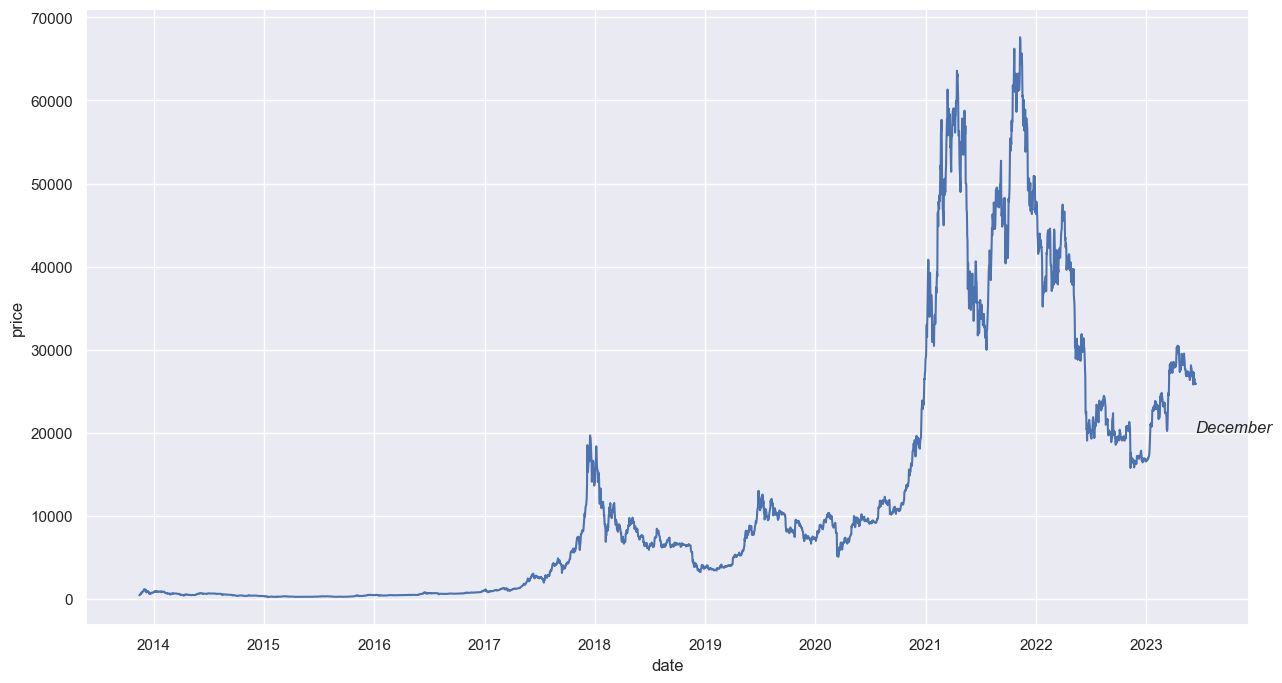

In [59]:
ax = sns.lineplot(x='date',y='price', data=btc_historical_prices)
ax.text(btc_historical_prices['date'].to_list()[-3], 20000, 'December', style='italic')


In [60]:
# Multiple lines on the same plot, very useful link here: 
# https://www.statology.org/seaborn-plot-multiple-lines/

In [61]:
btc_historical_prices.dtypes

date                 datetime64[ns]
price                       float64
market_cap                  float64
volume                      float64
coin                         object
price_sma_7                 float64
price_sma_30                float64
price_sma_90                float64
price_sma_180               float64
vol_sma_7                   float64
vol_sma_30                  float64
vol_sma_90                  float64
vol_sma_180                 float64
dev_price_sma_7             float64
dev_price_sma_30            float64
dev_price_sma_90            float64
dev_price_sma_180           float64
dev_vol_sma_7               float64
dev_vol_sma_30              float64
dev_vol_sma_90              float64
dev_vol_sma_180             float64
dtype: object

In [62]:
# IMP: I will need to make observations over bigger periods of time and/or different periods of time #

## Algo v0.1: An initial attempt at a simple algo to get some ideas
### I have explored this further later where I develop these ideas further

<Axes: >

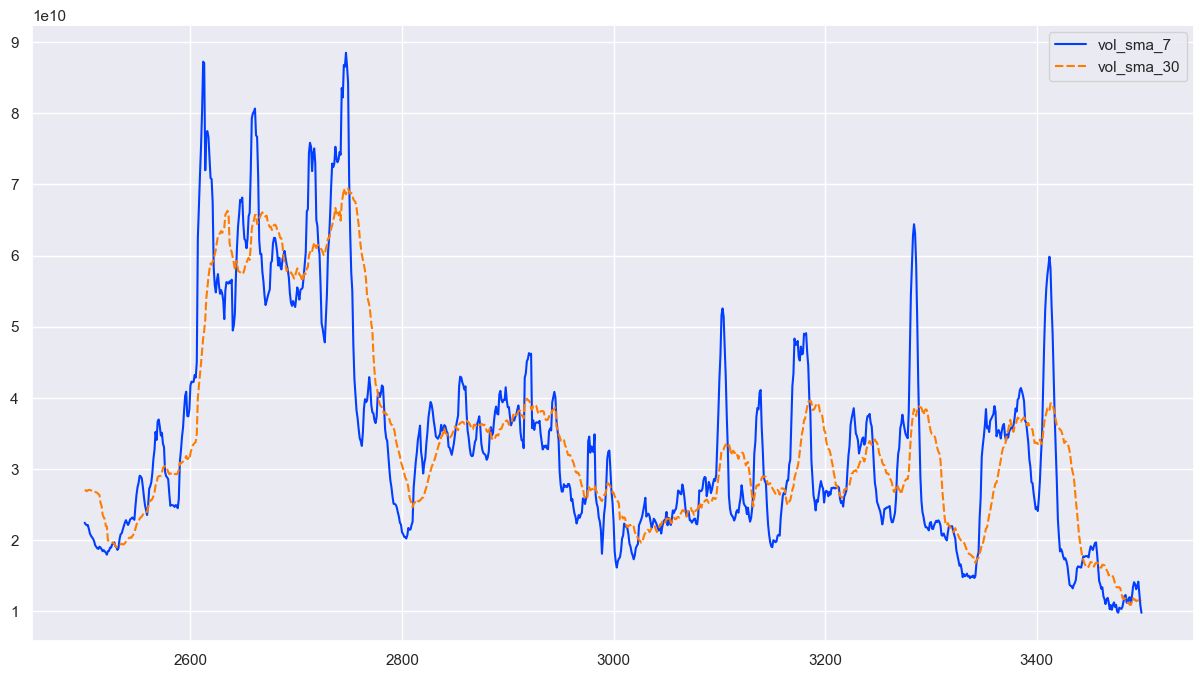

In [63]:
sns.lineplot(data=btc_historical_prices[['date','vol_sma_7','vol_sma_30']].tail(1000),palette='bright')

## Observations from the above and below charts
- Volume is MUCH more volatile than price 
- Since we are interested in higher time frame trades, it seems more useful to only look at SMAs as they smooth out the curve
- Deviation between 7-day and 30-day SMA of volumes seems to strongly predict whats going to happen
- Size of deviation seems to provide confidence/predict size of the move
- WHEN STUFF GOES UP, then 7-day vol moves significantly above 30-day vol and stays there, this is pretty strong and slightly predictive

- WHEN STUFF GOES DOWN, then 1. There is a large increase in 7-day vol compated to 30-day vol, followed by it going much lower the PRICE follows this pattern by a few days 


<Axes: >

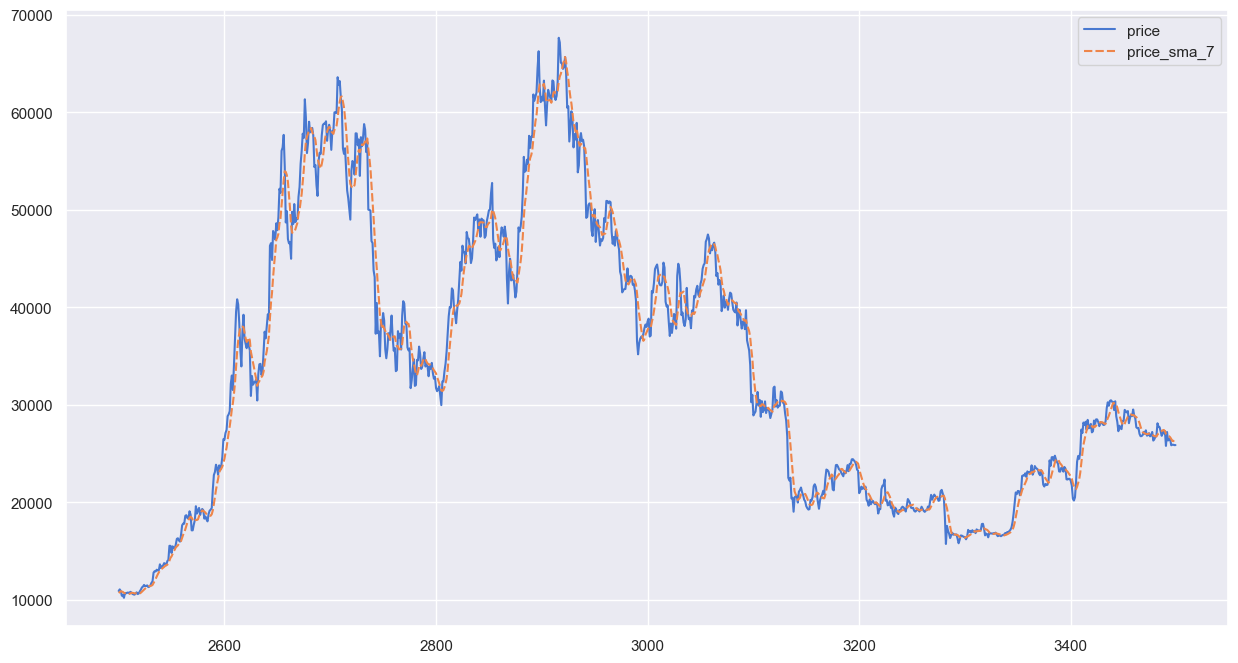

In [64]:
sns.lineplot(data=btc_historical_prices[['date','price','price_sma_7']].tail(1000),palette='muted')

<Axes: >

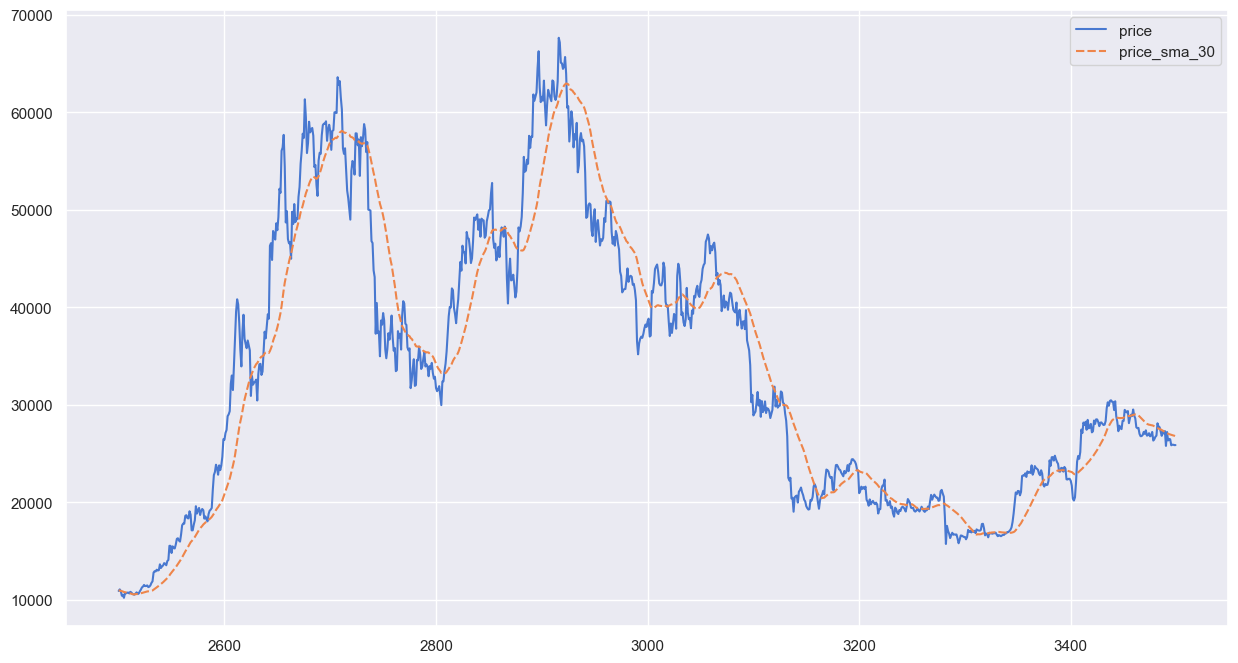

In [65]:
sns.lineplot(data=btc_historical_prices[['date','price','price_sma_30']].tail(1000),palette='muted')

<Axes: >

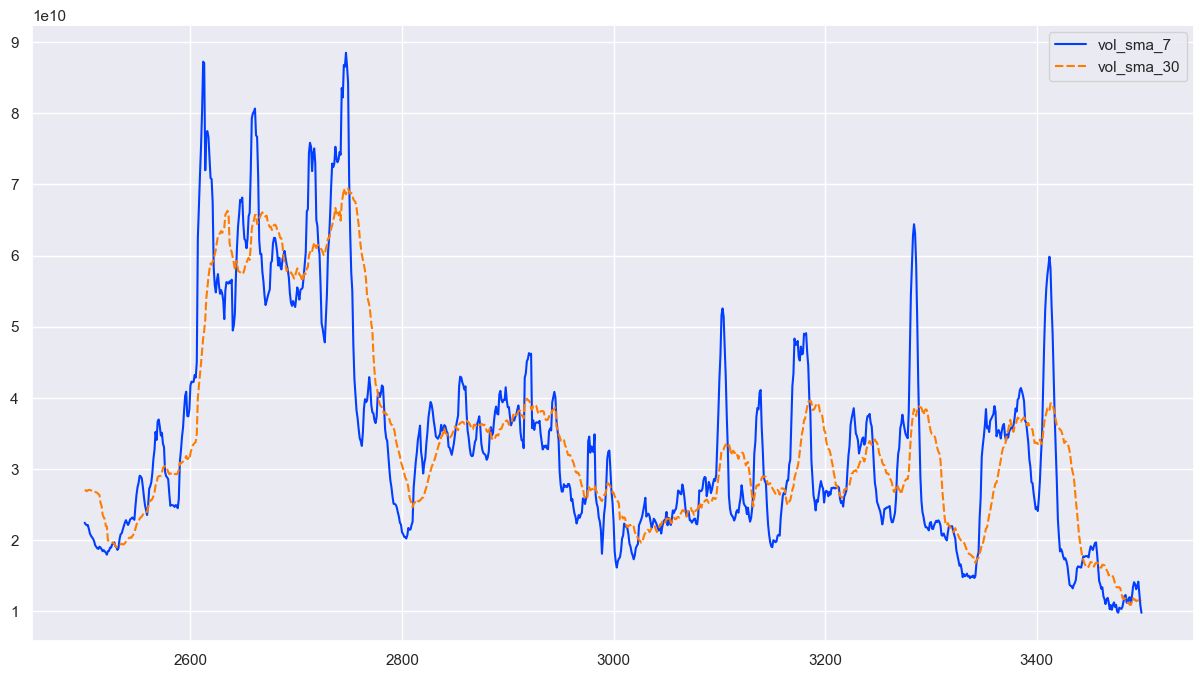

In [66]:
sns.lineplot(data=btc_historical_prices[['date','vol_sma_7','vol_sma_30']].tail(1000),palette='bright')

## Observations from above 2 and the below graphs 
- WHEN STUFF GOES UP then 30-day vol is significantly up than 7-day vol AND 7-day price is above 30-day price significantly too (say 10%)
- WHEN STUFF goes down then 30-day vol is significantly higher than 7-day and 7-day price is signficantly (Say 10%) lower than 30-day price


<Axes: >

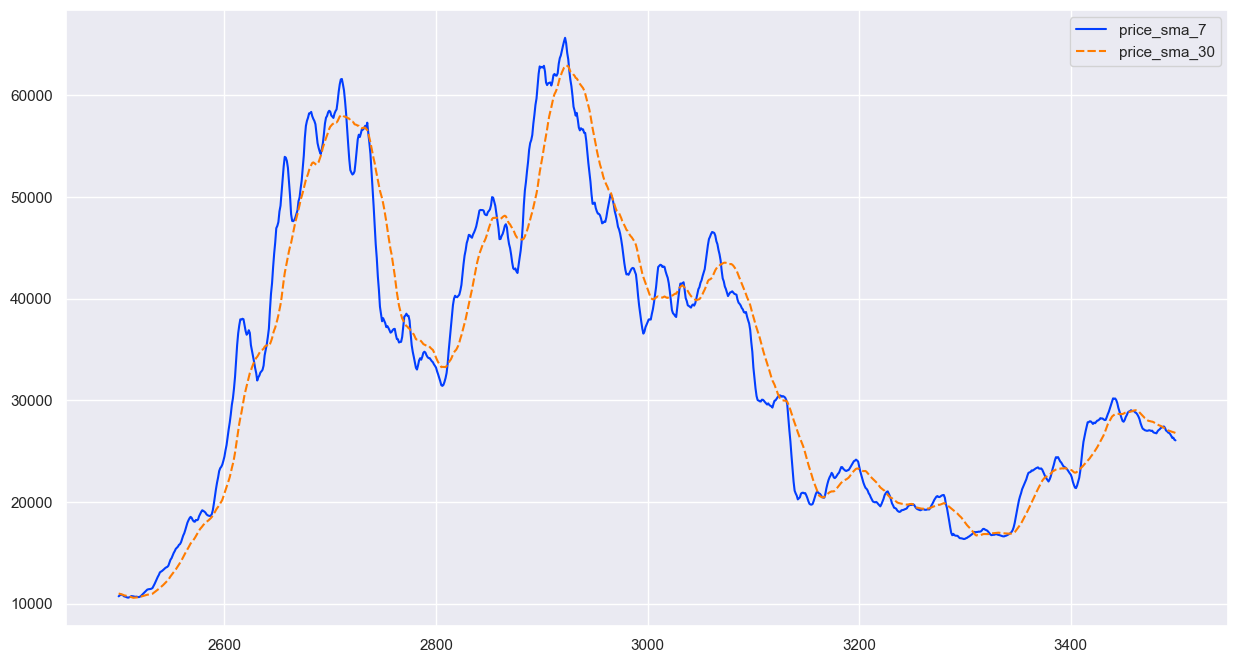

In [67]:


sns.lineplot(data=btc_historical_prices[['date','price_sma_7','price_sma_30']].tail(1000),palette='bright')


# A simple algorithm could be:

1. When 7-day vol is above a threshold (say 25%) than 30-day vol and 7-day price is above another threshold (say 10%) (i.e. trending up) then BUY 
2. When 7-day vol threshold is above another threshold (say 25%) above 30-day vol and 7-day price is below another thresold, say 10% (i.e.price is trending down) then SELL
3. 7-day vol going siginifcantly lower than 30-day will confirm the bearish trend
4. Similarly 7-day prices consistently staying above 30-days confirms the bull trend


### Some ideas
- shall i consider having diff between sma7 and sma 30 values? and perhaps use them as a feature in the model?
- shall i consider having volaitility/std dev to come up with the thresholds to detect a signal?

### Ideas on designing the algorithm

## Signal
1. One function should simply return whether we should buy or sell or do nothing on a given date
2. LATER I can add functionality that will help with sizing/confidence. Perhaps it will be best to keep asset allocation and risk management out of this piece, as that could be more global and this could just give us the signal, confidence level and perhaps an indication of size of the move

### Backtesting 
1. Perhaps I can just calculate the price on the day of entry and then at exit, and cal the % gain and use that as the metric to be optimised as well. Later I can think about making this much more sophisiticated I suppose, but in the beginning this shoudl suffice 

### Designing 
1. I must explore if there were ways of visualising the signals and deviations i.e. the workigns of the algo
2. I can try and do some initial adjustments to the thresholds and backtest and refine 
3. Once a basic and not very scary initial algo is made, I will move to actually executing trades and using the Kraken API to start doing so 
4. Later I will conitnue to work on making the basic algo more sophisticated, performant and better technically designed (e.g. running on a server, broken up into components, etc.)
5. I am first going to get a basic version working i.e. deploying actual money, before moving on to making it better

### Future
1. at some point, after the basic version is working, I will explore adding additional signals like coins moving onn/off exchange, signals from other coins, copy trading/wallet/blockhain analysis, tradfi signals, twitter sentiment, etc. to my algo 
2. Once I have had a few go s at teh algo my self, with raw thinking and Neha's help, then I will study existing materials and books to understand algo trading better 

## Designing the simple algorithm 
- this is for BTC at the moment, later I will add same thing for ETH as well 

### <font color='purple'> find out if I can visualise buy/sell signals on the chart </font>

In [68]:
### Showing annotations on the plot 

In [69]:
## generate a temp signal array 

In [70]:
# great link on finding no. of rows in a df
# https://stackoverflow.com/questions/15943769/how-do-i-get-the-row-count-of-a-pandas-dataframe
#del(temp)
temp = [None]*len(btc_historical_prices.index)
temp

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [71]:
# great link on generating a given no. of rand integers from a given sample 
# https://pynative.com/python-random-randrange/ 
for i in random.sample(range(0,3500),25):
    temp[i]='BUY'
    
for i in random.sample(range(0,3500),25):
    temp[i]='SELL'
    
temp


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 'SELL',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 'SELL',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 N

In [72]:
len(btc_historical_prices.index)

3500

In [73]:
btc_historical_prices['temp_signal'] = temp


In [74]:
# 2 neat ways of filtering on non-empty rows for a given column
#https://stackoverflow.com/questions/39475566/python-pandas-filter-out-records-with-null-or-empty-string-for-a-given-field 
btc_historical_prices[~btc_historical_prices.temp_signal.isnull()]

date         price    market_cap        volume coin   price_sma_7   
13   2013-11-27    914.130000  1.100942e+10  0.000000e+00  btc    790.011429  \
105  2014-02-27    586.280000  7.300959e+09  3.821900e+07  btc    570.287143   
160  2014-04-23    487.525000  6.231921e+09  8.412033e+06  btc    490.936000   
183  2014-05-16    445.165000  5.725218e+09  5.292981e+06  btc    442.706429   
369  2014-11-18    374.868300  5.066664e+09  1.094406e+08  btc    393.321414   
429  2015-01-17    199.491400  2.740019e+09  1.064315e+08  btc    220.712124   
440  2015-01-29    232.532942  3.203612e+09  1.619716e+08  btc    247.133135   
447  2015-02-05    216.913600  2.994172e+09  7.414217e+07  btc    225.883071   
663  2015-09-09    237.945200  3.472697e+09  5.599305e+07  btc    236.071714   
768  2015-12-23    442.821000  6.640942e+09  9.559491e+08  btc    448.619714   
818  2016-02-11    377.058000  5.730999e+09  5.039793e+08  btc    376.869571   
902  2016-05-05    448.922000  6.962982e+09  5.479212e+08  btc    449.698571   
930  2016-06-02    538.832000  8.413013e+09  6.556019e+08  btc    524.380571   
940  2016-06-12    671.712278  1.051277e+10  2.134843e+09  btc    596.129455   
978  2016-07-20    670.893474  1.057913e+10  7.184864e+08  btc    669.627550   
1325 2017-07-02   2518.545694  4.136519e+10  2.267842e+08  btc   2515.111730   
1388 2017-09-03   4632.462331  7.663106e+10  1.007166e+09  btc   4559.900579   
1568 2018-03-02  10859.552194  1.834637e+11  2.892166e+09  btc  10287.887523   
1675 2018-06-17   6478.815924  1.107722e+11  1.306649e+09  btc   6584.843396   
1676 2018-06-18   6418.850002  1.097596e+11  1.120786e+09  btc   6535.036327   
1718 2018-07-30   8197.593576  1.408274e+11  2.598593e+09  btc   8105.152111   
1745 2018-08-26   6736.036058  1.160734e+11  5.280060e+09  btc   6494.826491   
1765 2018-09-15   6500.012255  1.123344e+11  5.350597e+09  btc   6335.151418   
1836 2018-11-25   3895.836813  6.775613e+10  3.115187e+09  btc   4596.049957   
1847 2018-12-06   3751.691966  6.535577e+10  3.020004e+09  btc   4025.365222   
1848 2018-12-07   3466.763864  6.035792e+10  3.672494e+09  btc   3909.263547   
1888 2019-01-16   3567.801243  6.234881e+10  2.953789e+09  btc   3649.863019   
1911 2019-02-08   3394.014653  5.948240e+10  3.297275e+09  btc   3448.406758   
2001 2019-05-09   5957.856733  1.052718e+11  1.667241e+10  btc   5750.019207   
2303 2020-03-06   9038.870323  1.650703e+11  3.812264e+10  btc   8756.890685   
2309 2020-03-12   7935.522040  1.449485e+11  3.868904e+10  btc   8411.695493   
2325 2020-03-28   6397.826328  1.170197e+11  3.291055e+10  btc   6435.889802   
2348 2020-04-20   7127.511950  1.306807e+11  2.971477e+10  btc   6973.194203   
2420 2020-07-01   9149.721997  1.685587e+11  1.974144e+10  btc   9171.701811   
2445 2020-07-26   9691.825139  1.787409e+11  3.672607e+10  btc   9440.291698   
2478 2020-08-28  11300.398364  2.087476e+11  2.159592e+10  btc  11530.631464   
2511 2020-09-30  10837.516587  2.005330e+11  1.830894e+10  btc  10664.335224   
2522 2020-10-11  11286.541942  2.092687e+11  1.949663e+10  btc  10852.582842   
2536 2020-10-25  13106.046019  2.427852e+11  1.930280e+10  btc  12421.193409   
2567 2020-11-25  19091.524182  3.542099e+11  4.942953e+10  btc  18401.551980   
2678 2021-03-16  55805.329249  1.049197e+12  7.059449e+10  btc  57487.569355   
2817 2021-08-02  39914.829758  7.474038e+11  2.855517e+10  btc  39996.103555   
2970 2022-01-02  47816.077676  9.045519e+11  1.890459e+10  btc  48169.523989   
3125 2022-06-06  29917.764052  5.702099e+11  1.339523e+10  btc  30489.346074   
3169 2022-07-20  23366.907698  4.458890e+11  5.733822e+10  btc  21339.230059   
3231 2022-09-20  19570.386710  3.745242e+11  3.950794e+10  btc  19863.813136   
3304 2022-12-02  16972.734061  3.261419e+11  2.331957e+10  btc  16609.025993   
3309 2022-12-07  17085.643141  3.281082e+11  2.102613e+10  btc  17053.777188   
3385 2023-02-21  24786.665941  4.782365e+11  3.899705e+10  btc  24089.658964   
3406 2023-0

In [75]:
btc_historical_prices.temp_signal.unique()

array([None, 'SELL', 'BUY'], dtype=object)

In [77]:
# using enumerate to grab indexes and signals from btc historical prices df 
# we will actually use iterrows as thats a pandas specific way to do it and makes is much much easier for our case
# since we want to do this on .tail(1000) elements only 
for (i,signal) in enumerate(btc_historical_prices.temp_signal):
    if (signal != None):
        print(btc_historical_prices.date[i], btc_historical_prices.price[i], signal)

2013-11-27 00:00:00 914.13 SELL
2014-02-27 00:00:00 586.28 SELL
2014-04-23 00:00:00 487.525 BUY
2014-05-16 00:00:00 445.165 BUY
2014-11-18 00:00:00 374.8683 BUY
2015-01-17 00:00:00 199.4914 BUY
2015-01-29 00:00:00 232.5329422304941 SELL
2015-02-05 00:00:00 216.9136 BUY
2015-09-09 00:00:00 237.9452 BUY
2015-12-23 00:00:00 442.821 SELL
2016-02-11 00:00:00 377.058 SELL
2016-05-05 00:00:00 448.9219999999999 SELL
2016-06-02 00:00:00 538.832 BUY
2016-06-12 00:00:00 671.7122784950529 SELL
2016-07-20 00:00:00 670.8934740599931 SELL
2017-07-02 00:00:00 2518.54569431263 BUY
2017-09-03 00:00:00 4632.46233076675 BUY
2018-03-02 00:00:00 10859.5521943893 SELL
2018-06-17 00:00:00 6478.81592433021 SELL
2018-06-18 00:00:00 6418.85000188746 SELL
2018-07-30 00:00:00 8197.593575814208 BUY
2018-08-26 00:00:00 6736.036057516459 BUY
2018-09-15 00:00:00 6500.01225461663 BUY
2018-11-25 00:00:00 3895.8368129589876 SELL
2018-12-06 00:00:00 3751.691966395661 BUY
2018-12-07 00:00:00 3466.763863771732 SELL
2019-01-

In [76]:
# iterrows is a pandas provided iterator that returns the entire pandas dataframe row and helps us iterate
#over the df this way we dont have to worry about index of the dataframe. I was using enumerate, however, i also 
#wanted to manipulate tail(1000) elements only which was proving to be pretty difficult but iterrows is teh natural
#way of doing it (suggested by Neha)
# here is a nice quick link on using iterrows: 
# https://stackoverflow.com/questions/16476924/how-to-iterate-over-rows-in-a-dataframe-in-pandas 


for index, row in btc_historical_prices.iterrows():
    if (row['temp_signal'] != None):
        print(row['date'], row['price'], row['temp_signal'])

2013-11-27 00:00:00 914.13 SELL
2014-02-27 00:00:00 586.28 SELL
2014-04-23 00:00:00 487.525 BUY
2014-05-16 00:00:00 445.165 BUY
2014-11-18 00:00:00 374.8683 BUY
2015-01-17 00:00:00 199.4914 BUY
2015-01-29 00:00:00 232.5329422304941 SELL
2015-02-05 00:00:00 216.9136 BUY
2015-09-09 00:00:00 237.9452 BUY
2015-12-23 00:00:00 442.821 SELL
2016-02-11 00:00:00 377.058 SELL
2016-05-05 00:00:00 448.9219999999999 SELL
2016-06-02 00:00:00 538.832 BUY
2016-06-12 00:00:00 671.7122784950529 SELL
2016-07-20 00:00:00 670.8934740599931 SELL
2017-07-02 00:00:00 2518.54569431263 BUY
2017-09-03 00:00:00 4632.46233076675 BUY
2018-03-02 00:00:00 10859.5521943893 SELL
2018-06-17 00:00:00 6478.81592433021 SELL
2018-06-18 00:00:00 6418.85000188746 SELL
2018-07-30 00:00:00 8197.593575814208 BUY
2018-08-26 00:00:00 6736.036057516459 BUY
2018-09-15 00:00:00 6500.01225461663 BUY
2018-11-25 00:00:00 3895.8368129589876 SELL
2018-12-06 00:00:00 3751.691966395661 BUY
2018-12-07 00:00:00 3466.763863771732 SELL
2019-01-

### Adding annotations to plot

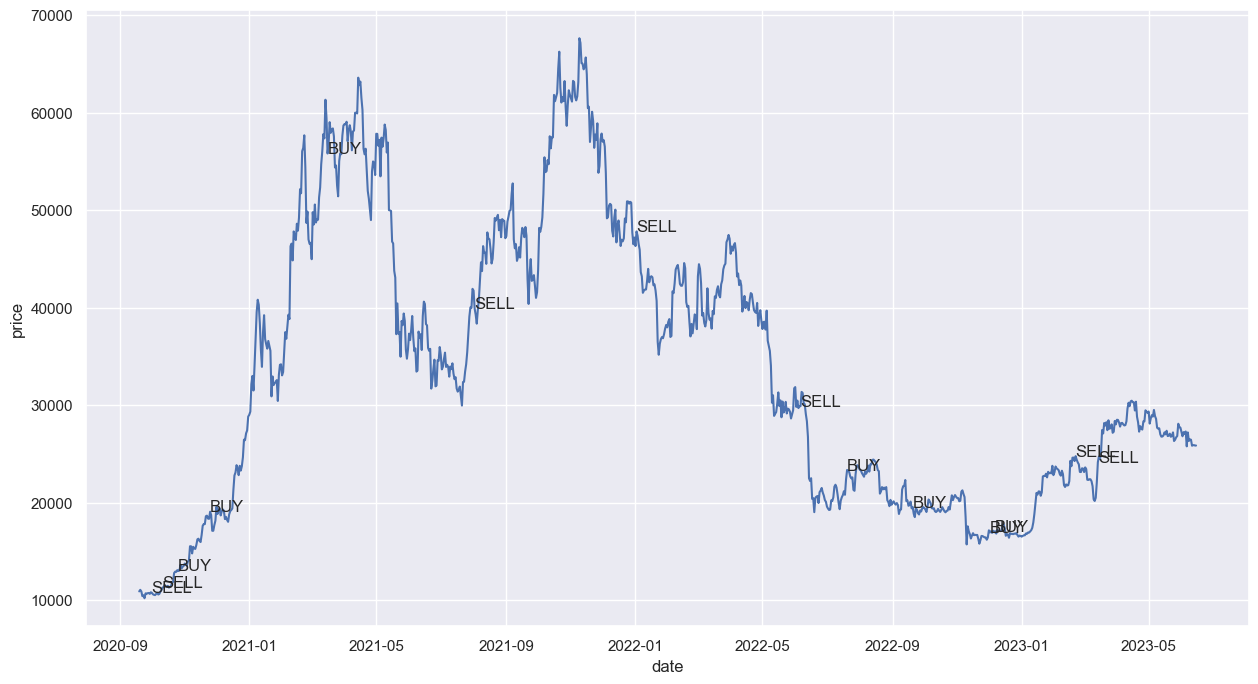

In [92]:
# https://www.geeksforgeeks.org/how-to-add-text-to-matplotlib/
# good link on adding text and annotations to plots
sns.lineplot(x='date',y='price',data=btc_historical_prices[['date','price','price_sma_30']].tail(1000))

for index, row in btc_historical_prices.tail(1000).iterrows():
    if (row['temp_signal'] != None):
        plt.text(row['date'], row['price'], row['temp_signal'])

#plt.show()


### Figuring out how to plot multiple lines on the same plot 

In [81]:
## METHOD1: Add multiple plots. PROs: easy syntax, easy to understanding, no melting needed CONS: legend and labeling

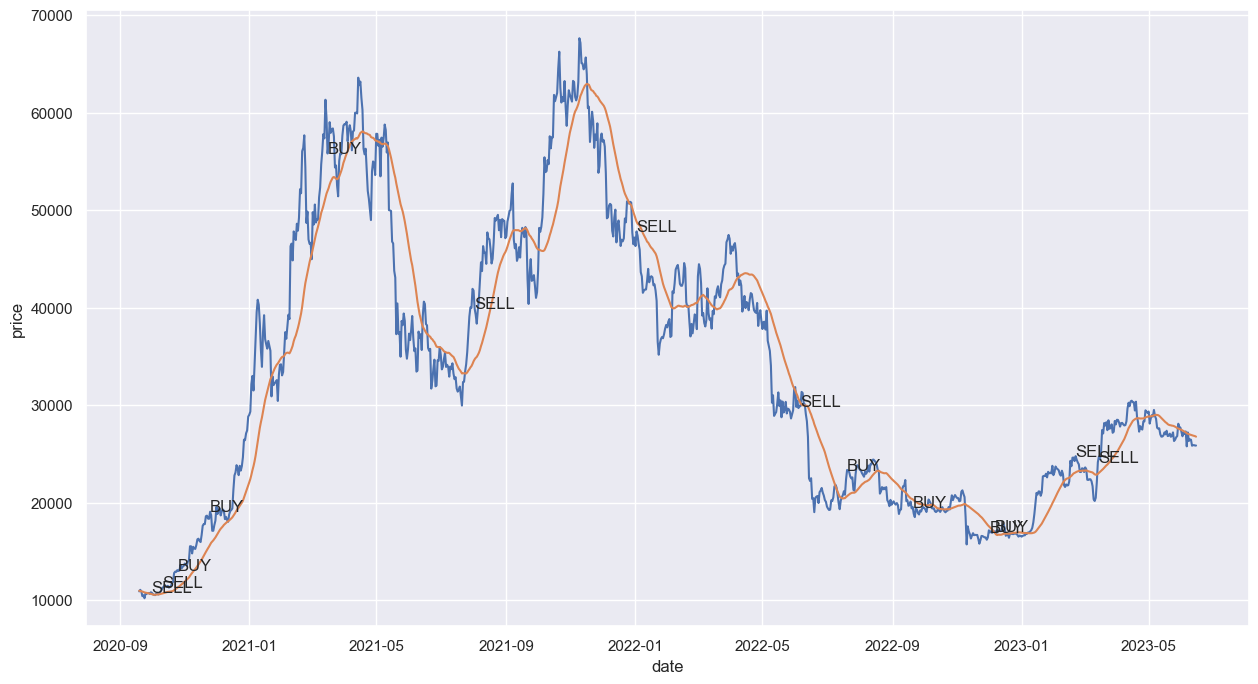

In [82]:

sns.lineplot(x='date', y='price',data=btc_historical_prices[['date','price','price_sma_30']].tail(1000))

sns.lineplot(x='date', y='price_sma_30',data=btc_historical_prices[['date','price','price_sma_30']].tail(1000))

for index, row in btc_historical_prices.tail(1000).iterrows():
    if (row['temp_signal'] != None):
        plt.text(row['date'], row['price'], row['temp_signal'])

In [83]:
## MEthOD2: Usign melt function PROS: axes, legend, etc. easy and natural CONS: unneccessary manipulation of data to fit a plotting library 

In [84]:
# plotting several lines on the same plot, trying to use melt function to do this 
# info at the end of this link: https://www.statology.org/seaborn-plot-multiple-lines/
data=pd.melt(btc_historical_prices[['date','price','price_sma_30']].tail(10), ['date'])
data

date      variable         value
0  2023-06-06 00:00:00         price  25792.616090
1  2023-06-07 00:00:00         price  27216.615565
2  2023-06-08 00:00:00         price  26346.244545
3  2023-06-09 00:00:00         price  26507.909892
4  2023-06-10 00:00:00         price  26469.581684
5  2023-06-11 00:00:00         price  25858.122892
6  2023-06-12 00:00:00         price  25916.579896
7  2023-06-13 00:00:00         price  25910.362743
8  2023-06-14 00:00:00         price  25872.206459
9  2023-06-14 18:42:33         price  25876.030215
10 2023-06-06 00:00:00  price_sma_30  27128.742125
11 2023-06-07 00:00:00  price_sma_30  27082.248004
12 2023-06-08 00:00:00  price_sma_30  27037.230796
13 2023-06-09 00:00:00  price_sma_30  27000.581403
14 2023-06-10 00:00:00  price_sma_30  26961.576340
15 2023-06-11 00:00:00  price_sma_30  26922.688246
16 2023-06-12 00:00:00  price_sma_30  26893.651229
17 2023-06-13 00:00:00  price_sma_30  26864.059111
18 2023-06-14 00:00:00  price_sma_30  26829.405818
19 2023-06-14 18:42:33  price_sma_30  26784.347044

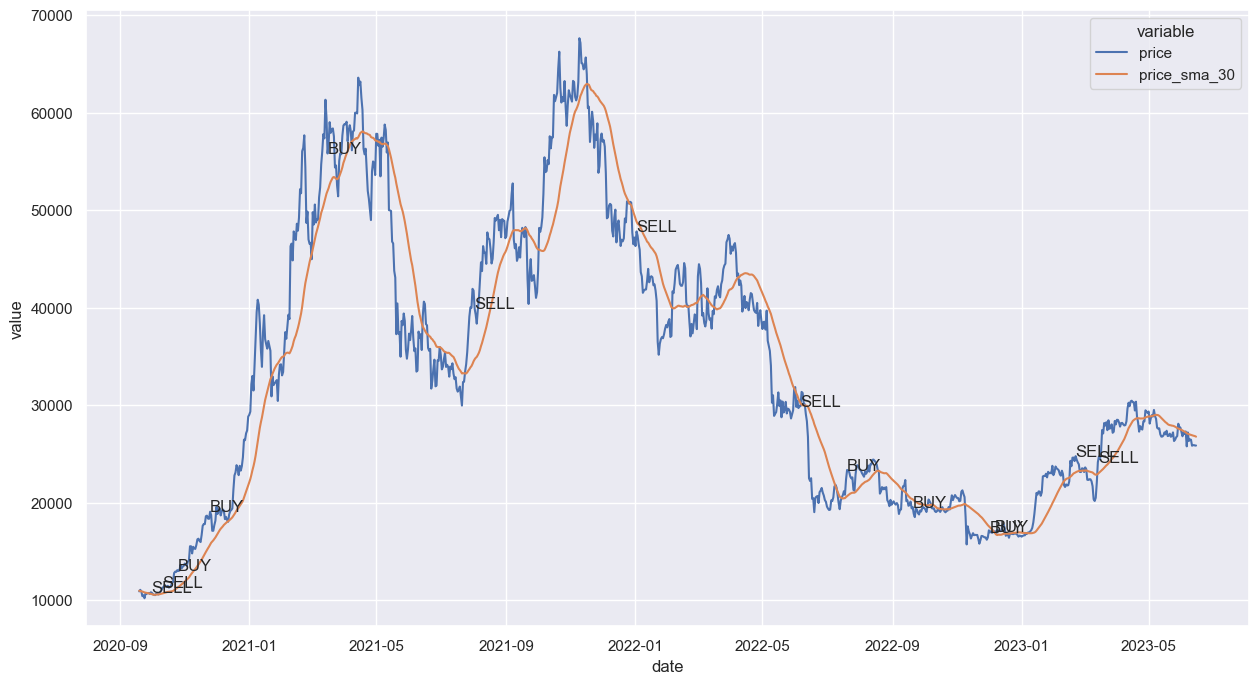

In [85]:

sns.lineplot(x='date',y='value',data=pd.melt(btc_historical_prices[['date','price','price_sma_30']].tail(1000), ['date']),hue='variable')

for index, row in btc_historical_prices.tail(1000).iterrows():
    if (row['temp_signal'] != None):
        plt.text(row['date'], row['price'], row['temp_signal'])

In [86]:
##Method 3, provide all rows as a single data frame PROs: no melting needed   CONS: x-axis is screwed; its a sequence rather than dates
# not going to use this one as cant annotate text and hard to interpret

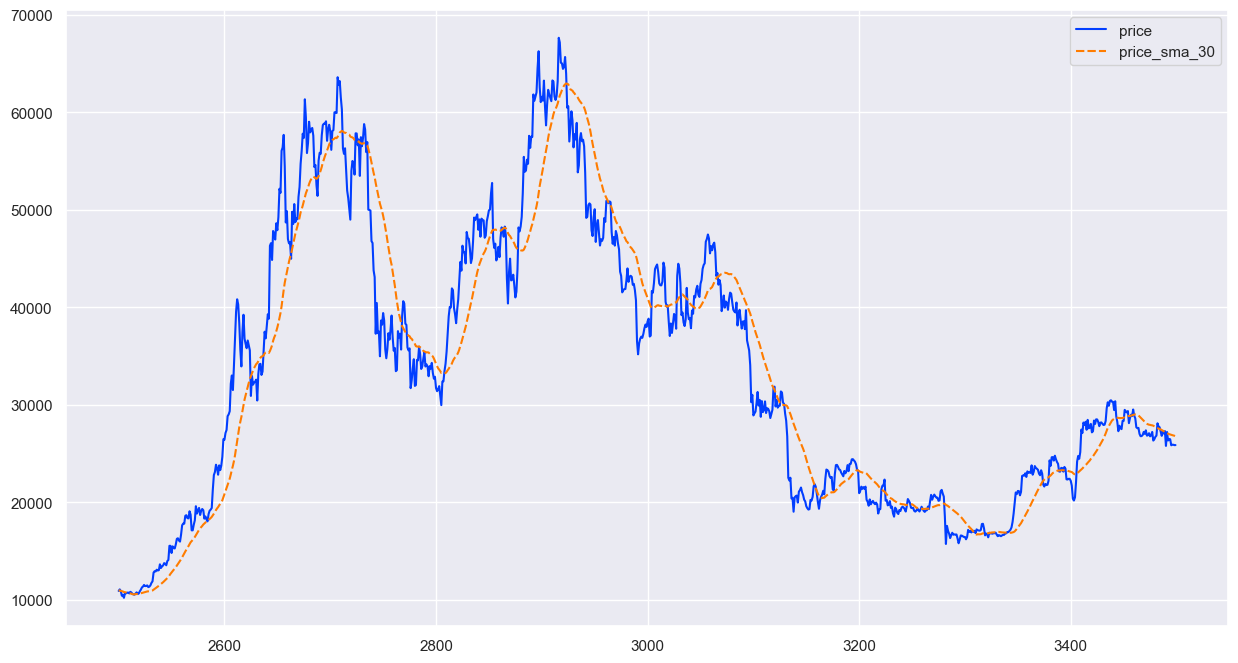

In [91]:
sns.lineplot(data=btc_historical_prices[['date','price','price_sma_30']].tail(1000),palette='bright')
#for index, row in btc_historical_prices.tail(1000).iterrows():
 #   if (row['temp_signal'] != None):
  #      plt.text(row['date'], row['price'], row['temp_signal'])
# X axis is fucked which is likely the reason I cant print text annotations as date is not really the x axis here!!
plt.show()

In [ ]:
##Method 4: OLD school, use matplotlib
# for laters, If time permits, not a priority as I already found 2 useful methods!

### Visualising the % deviations on the chart 

#### plotting 2 axes on a plot 
good quick link for this: https://stackoverflow.com/questions/47591650/second-y-axis-time-series
basically create and use another axis


<Axes: xlabel='date', ylabel='dev_price_sma_30'>

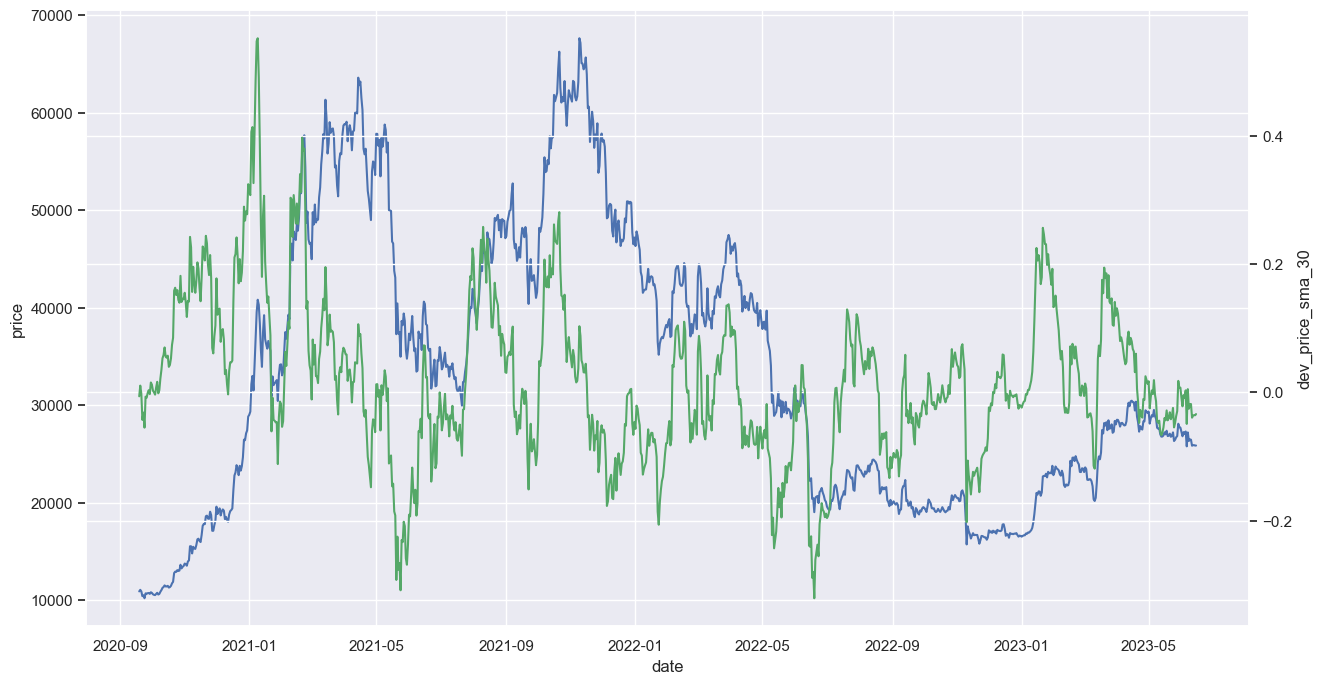

In [102]:
sns.lineplot(x='date', y='price',
             data=btc_historical_prices[['date','price','price_sma_30']].tail(1000),color='b')
ax2=plt.twinx() #this does the magic
sns.lineplot(x='date', y='dev_price_sma_30',
              data=btc_historical_prices[['date','dev_price_sma_7','dev_price_sma_30']].tail(1000),color='g',ax=ax2)

#### plotting deviations on the chart 

<Axes: xlabel='date', ylabel='dev_vol_7_30'>

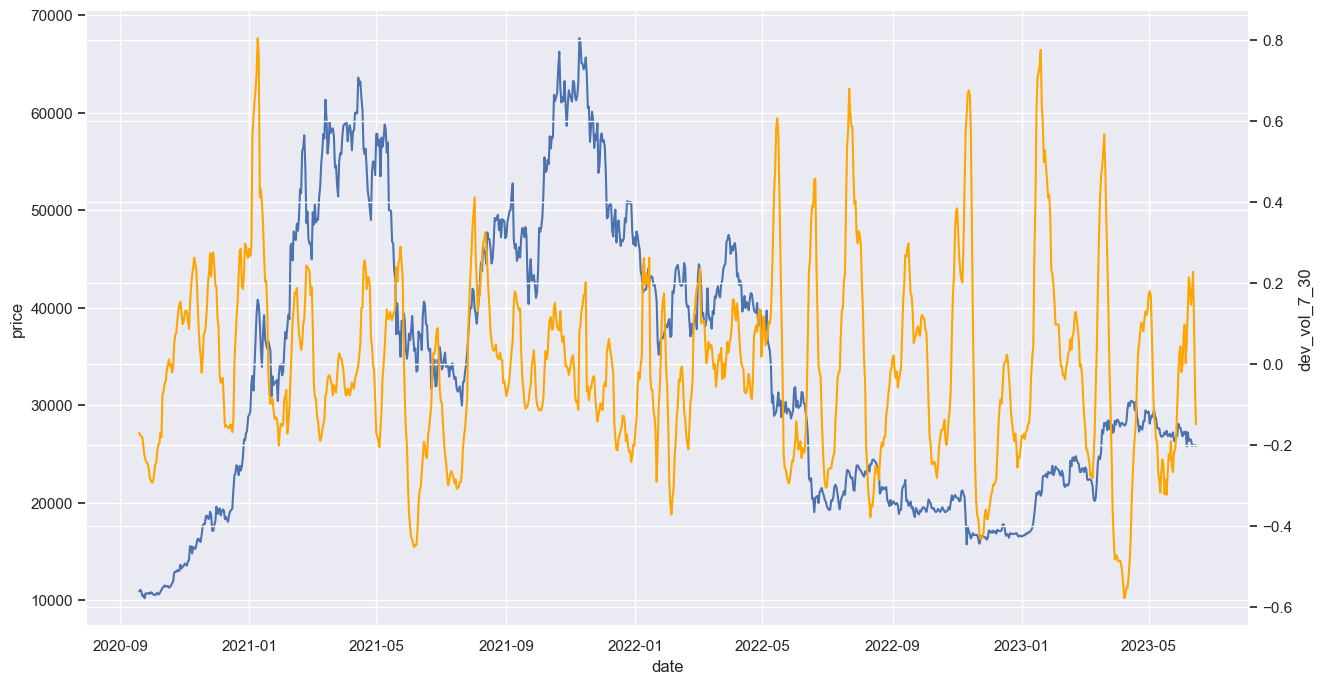

In [112]:
sns.lineplot(x='date', y='price',
             data=btc_historical_prices[['date','price','price_sma_30']].tail(1000),color='b')
ax2=plt.twinx() 
sns.lineplot(x='date', y='dev_vol_7_30',
              data=btc_historical_prices[['date','dev_vol_7_30','dev_price_sma_30']].tail(1000),color='orange',ax=ax2)

In [119]:
btc_historical_prices.describe()

date         price    market_cap   
count                           3500   3500.000000  3.499000e+03  \
mean   2018-08-30 08:59:41.530000128  12377.020013  2.297450e+11   
min              2013-11-14 00:00:00    172.147900  2.362640e+09   
25%              2016-04-07 18:00:00    618.765632  9.003250e+09   
50%              2018-08-30 12:00:00   6634.255847  1.147422e+11   
75%              2021-01-21 06:00:00  18171.012347  3.345827e+11   
max              2023-06-14 18:42:33  67617.015545  1.278798e+12   
std                              NaN  15741.239051  2.982744e+11   

             volume   price_sma_7  price_sma_30  price_sma_90  price_sma_180   
count  3.500000e+03   3494.000000   3471.000000   3411.000000    3321.000000  \
mean   1.494209e+10  12375.632978  12366.307573  12331.224196   12312.649701   
min    0.000000e+00    203.151300    224.437643    236.047097     242.357982   
25%    3.568608e+08    621.168331    611.363993    605.922722     590.937093   
50%    4.372642e+09   6588.635741   6672.083238   6891.599290    7283.127813   
75%    2.525304e+10  18117.191216  17782.414080  18226.852481   19372.373183   
max    1.788941e+11  65652.921591  62939.128266  56243.654655   50537.138808   
std    1.871954e+10  15725.521192  15666.615808  15463.811227   15146.208634   

          vol_sma_7    vol_sma_30  ...   vol_sma_180  dev_price_sma_7   
count  3.494000e+03  3.471000e+03  ...  3.321000e+03      3494.000000  \
mean   1.495971e+10  1.501873e+10  ...  1.519816e+10         0.003900   
min    0.000000e+00  0.000000e+00  ...  2.332002e+07        -0.345271   
25%    4.117148e+08  4.510372e+08  ...  9.575908e+08        -0.020410   
50%    4.369916e+09  4.433328e+09  ...  3.909559e+09         0.002433   
75%    2.614678e+10  2.718848e+10  ...  2.922994e+10         0.029541   
max    8.849832e+10  6.941579e+10  ...  5.950009e+10         0.444755   
std    1.789616e+10  1.738169e+10  ...  1.648632e+10         0.053288   

       dev_price_sma_30  dev_price_sma_90  dev_price_sma_180  dev_vol_sma_7   
count       3471.000000       3411.000000        3321.000000    3457.000000  \
mean           0.018055          0.061541           0.140560       0.017290   
min           -0.432662         -0.495556          -0.582205      -0.987693   
25%           -0.054608         -0.107181          -0.162911      -0.188287   
50%            0.008574          0.018189           0.070562      -0.038201   
75%            0.082279          0.201149           0.326961       0.143416   
max            1.021754          1.893556           2.870716       6.000000   
std            0.127752          0.258935           0.426994       0.378939   

       dev_vol_sma_30  dev_vol_sma_90  dev_vol_sma_180  dev_vol_7_30  
count     3457.000000     3411.000000      3321.000000   3457.000000  
mean         0.077790        0.151471         0.298090      0.045265  
min         -0.993005       -0.994497        -0.992013     -0.978876  
25%         -0.253289       -0.322782        -0.345418     -0.166960  
50%         -0.053749       -0.035873        -0.031527     -0.006434  
75%          0.221760        0.383356         0.566605      0.203217  
max         29.000000       54.103480        64.850223      3.285714  
std          0.870385        1.208223         1.566787      0.383383  

[8 rows x 21 columns]

### design a function along the lines of the algo that returns a buy/sell/do nothing on a given date

#### calculation for the buy signals

In [489]:
btc_historical_prices['signal'] = None # create a column for signal 
for index, row in btc_historical_prices.iterrows():
    if (row['dev_vol_7_30'] >=0.20 and row['dev_price_7_30'] >=0.025):
        btc_historical_prices.at[index,'signal'] ='BUY' #below is a good link on assigning a cell in pandas data frame
                                                         # https://www.geeksforgeeks.org/how-to-set-cell-value-in-pandas-dataframe/
# Will parametrise these thresholds and apply ML to find optimal ones later  

<Axes: xlabel='date', ylabel='dev_vol_7_30'>

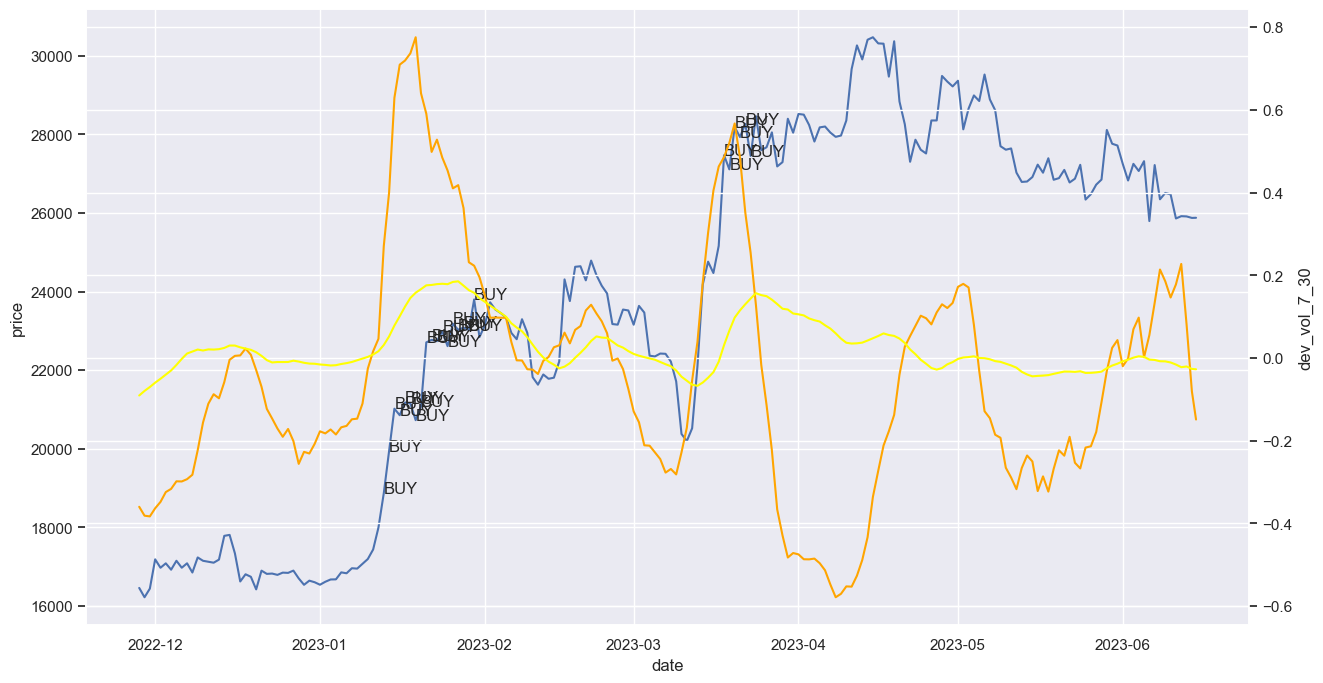

In [490]:

# plot signals and indicators for a given number of points from the tail
num_points=200

sns.lineplot(x='date', y='price',
             data=btc_historical_prices[['date','price','price_sma_30']].tail(num_points),color='b')


for index, row in btc_historical_prices.tail(200).iterrows():
    if (row['signal'] != None):
        plt.text(row['date'], row['price'], row['signal']) # doing this after declaring 2nd axis throws error!
        
ax2=plt.twinx() 
sns.lineplot(x='date', y='dev_vol_7_30',
              data=btc_historical_prices[['date','dev_vol_7_30','dev_price_sma_30']].tail(num_points),color='orange',ax=ax2)

sns.lineplot(x='date', y='dev_price_7_30',
              data=btc_historical_prices[['date','dev_price_7_30']].tail(num_points),color='yellow',ax=ax2)



#### calculation for the sell signal

In [491]:
#btc_historical_prices['signal'] = None # create a column for signal 
for index, row in btc_historical_prices.iterrows():
    if (row['dev_vol_7_30'] >=0.15 and row['dev_price_sma_7'] <=0.025):
        btc_historical_prices.at[index,'signal'] ='SELL'

<Axes: xlabel='date', ylabel='dev_vol_7_30'>

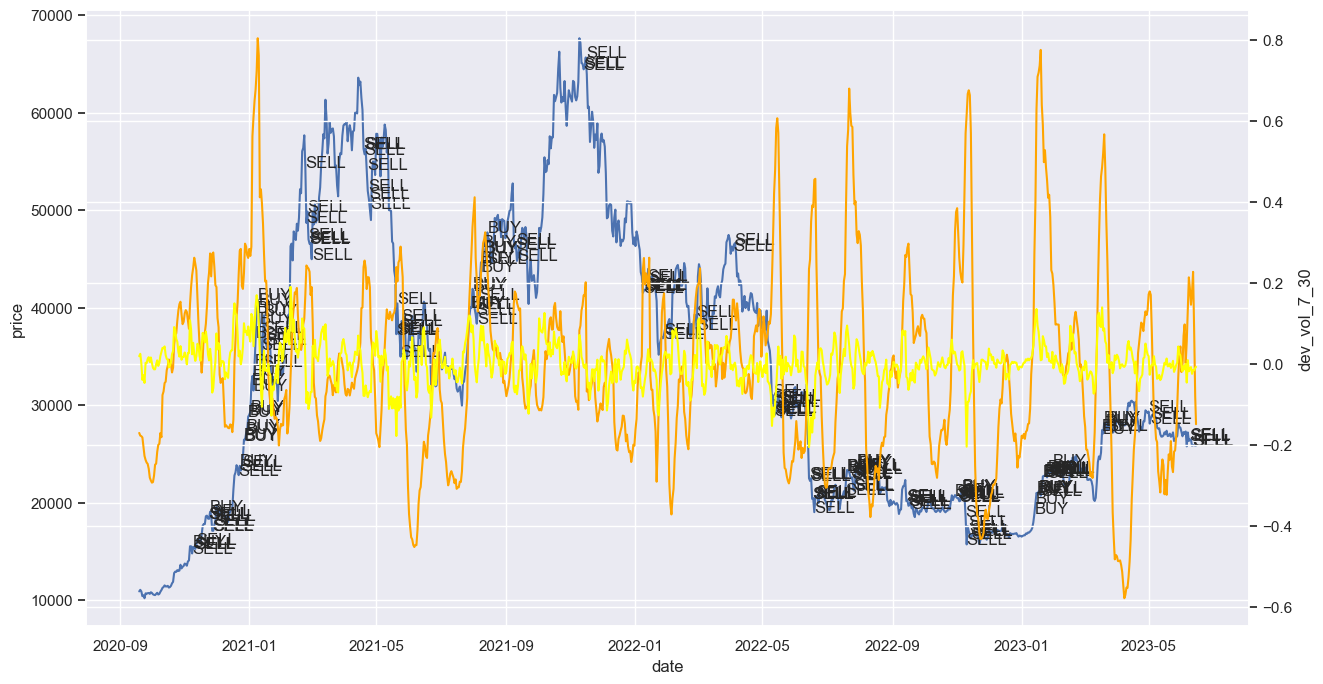

In [492]:
# plot signals and indicators for a given number of points from the tail
num_points=1000

sns.lineplot(x='date', y='price',
             data=btc_historical_prices[['date','price','price_sma_30']].tail(num_points),color='b')


for index, row in btc_historical_prices.tail(num_points).iterrows():
    if (row['signal'] != None):
        plt.text(row['date'], row['price'], row['signal']) # doing this after declaring 2nd axis throws error!
        
ax2=plt.twinx() 
sns.lineplot(x='date', y='dev_vol_7_30',
              data=btc_historical_prices[['date','dev_vol_7_30','dev_price_sma_30']].tail(num_points),color='orange',ax=ax2)

sns.lineplot(x='date', y='dev_price_sma_7',
              data=btc_historical_prices[['date','dev_price_sma_7']].tail(num_points),color='yellow',ax=ax2)

<Axes: xlabel='date', ylabel='dev_vol_7_30'>

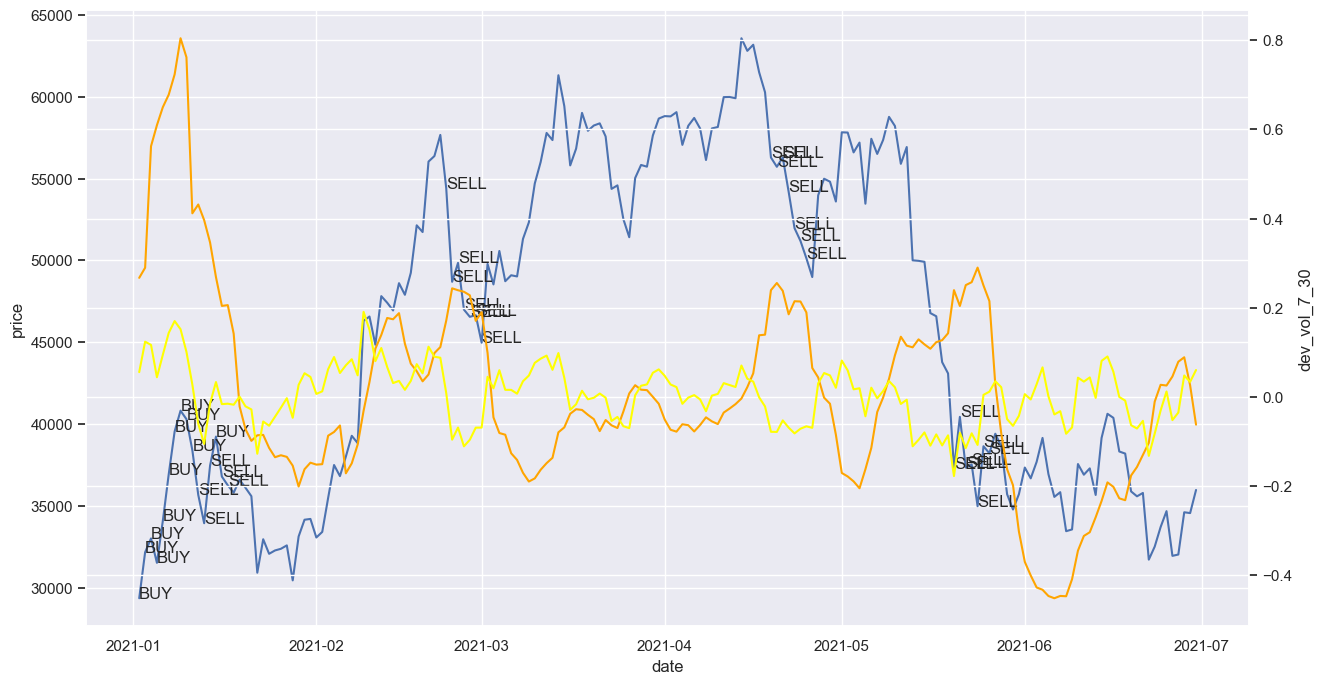

In [503]:
# plot signals and indicators for a given date range in a given range of dates 

from_date= '2021-01-01' #datetime.datetime(2021, 1, 1)
to_date= '2021-07-01' #datetime.datetime(2022, 7, 1) #https://www.w3schools.com/python/gloss_python_date_create.asp creating datetime objects

plot_data=btc_historical_prices[(btc_historical_prices['date']>from_date) & (btc_historical_prices['date']<to_date) ]

sns.lineplot(x='date', y='price',
             data=plot_data[['date','price','price_sma_30']],color='b')


for index, row in plot_data.iterrows():
    if (row['signal'] != None):
        plt.text(row['date'], row['price'], row['signal'])
        

ax2=plt.twinx() 
sns.lineplot(x='date', y='dev_vol_7_30',
              data=plot_data[['date','dev_vol_7_30','dev_price_sma_30']],color='orange',ax=ax2)


sns.lineplot(x='date', y='dev_price_sma_7',
              data=plot_data[['date','dev_price_sma_7']],color='yellow',ax=ax2)

### Cleanup the signals 


<i>clean up the signals so that they represent trade recommendations, i.e. a single buy, followed by a sell</i>

1.  create functions or isBuyorSell() that returns whether there is a buy of a sell signal on a given date
2.  as soon as I see a BUY signal, call a 'trade' function that takes buy date as the input and returns the sell date, it also adds these on the data frame 
    the function will check isBuyorSell() from buy date+1, until it encounters a sell, upon which it will register the signal on DF and return the sell date to the calling function 
3. then we start the above function from the next date after the previous trade 

In [369]:
def isBuyorSell(date):
    return (btc_historical_prices[btc_historical_prices.date==date]['signal'].iloc[0]) # tested OK (temp comment)

In [422]:
# set buy date as the date passed and keep scanning until I find a sell, then record it and return the sell date
### LATER: I need to think about the cases where BUY and SELL were actually being calculated for the same date###
format = '%Y-%m-%d' # https://www.geeksforgeeks.org/python-convert-string-to-datetime-and-vice-versa/
                    # converting strings to dates

def create_trade(buy_date):
    if(type(buy_date)==str):
        buy_date=datetime.datetime.strptime(buy_date, format)
    sell_date=buy_date # just declaring it so that its scope it bigger and I can use it for return statement
    btc_historical_prices.loc[btc_historical_prices.date ==buy_date,'trade_reco'] ='BUY'
    
    for idate in btc_historical_prices.date:
        if (idate <= buy_date):
            continue # skip the rest of the loop until we are past the buy_date
        elif (isBuyorSell(idate)=='SELL'):
            btc_historical_prices.loc[btc_historical_prices.date ==idate,'trade_reco'] ='SELL'
            sell_date=idate
            #print('breaking now')
            break # if SELL found, break the loop
    return sell_date

In [497]:
btc_historical_prices.trade_reco = None
start_date= btc_historical_prices.loc[0]['date']

for idate in btc_historical_prices.date : ### IMP: (check with Neha)should I sort the dates in case they are not in order in DF?
    if (idate<=start_date):
        continue # skip the code below if this date was already scanned for a trade signal
    elif (isBuyorSell(idate)=='BUY'):
        start_date=create_trade(idate) # record the trade and scan next 
        

In [418]:
btc_historical_prices[btc_historical_prices.trade_reco.notnull()]

date         price    market_cap        volume coin   price_sma_7   
51   2014-01-04    849.140000  1.035095e+10  3.634470e+07  btc    779.575714  \
54   2014-01-07    826.500000  1.010768e+10  8.026810e+07  btc    842.452857   
58   2014-01-11    905.720000  1.109459e+10  4.829950e+07  btc    877.560000   
59   2014-01-12    867.450000  1.063019e+10  4.017110e+07  btc    870.137143   
157  2014-04-20    497.317700  6.312897e+09  1.210310e+07  btc    496.917143   
...         ...           ...           ...           ...  ...           ...   
3280 2022-11-08  20597.755017  3.951685e+11  9.175098e+10  btc  20685.941880   
3346 2023-01-13  18866.810331  3.633811e+11  4.802511e+10  btc  17497.309075   
3364 2023-01-31  22840.385859  4.392957e+11  3.859460e+10  btc  23079.731086   
3384 2023-02-20  24284.478004  4.707985e+11  3.366468e+10  btc  23664.111583   
3447 2023-04-24  27606.578348  5.337532e+11  1.143565e+10  btc  28527.219412   

      price_sma_30  price_sma_90  price_sma_180     vol_sma_7  ...   
51      769.410667           NaN            NaN  2.920593e+07  ...  \
54      772.995333           NaN            NaN  5.172427e+07  ...   
58      768.652333           NaN            NaN  6.374347e+07  ...   
59      767.658333           NaN            NaN  6.056583e+07  ...   
157     484.981700    615.382078            NaN  3.450436e+07  ...   
...            ...           ...            ...           ...  ...   
3280  19884.342756  20372.496413   22439.100430  4.579345e+10  ...   
3346  16961.073012  17731.831351   19431.412793  2.304820e+10  ...   
3364  20161.592055  18197.137935   19367.044930  3.545766e+10  ...   
3384  23066.302159  19341.825648   19369.173317  4.105324e+10  ...   
3447  28645.647087  25350.116471   21676.374777  1.774844e+10  ...   

      dev_price_sma_180  dev_vol_sma_7  dev_vol_sma_30  dev_vol_sma_90   
51                  NaN       0.244429        2.690505             NaN  \
54                  NaN       0.551846        3.571838             NaN   
58                  NaN      -0.242283        0.953734             NaN   
59                  NaN      -0.336737        0.541445             NaN   
157                 NaN      -0.649230       -0.593563       -0.628661   
...                 ...            ...             ...             ...   
3280          -0.082060       1.003583        1.864793        1.981613   
3346          -0.029056       1.083681        1.647599        0.848353   
3364           0.179343       0.088470        0.301393        0.401788   
3384           0.253769      -0.179975       -0.085591        0.253231   
3447           0.273579      -0.355682       -0.289703       -0.622471   

      dev_vol_sma_180  temp_signal  dev_vol_7_30  signal  dev_price_7_30   
51                NaN         None      1.965622     BUY        0.013211  \
54                NaN         None      1.946065    SELL        0.089855   
58                NaN         None      1.578448     BUY        0.141687   
59                NaN         None      1.324031    SELL        0.133495   
157               NaN         None      0.158698     BUY        0.024610   
...               ...          ...           ...     ...             ...   
3280         1.968515         None      0.429835    SELL        0.040313   
3346         0.640360         None      0.270635     BUY        0.031616   
3364         0.363217         None      0.195617    SELL        0.144738   
3384         0.139068         None      0.115099     BUY        0.025917   
3447        -0.605033         None      0.102401    SELL       -0.004134   

      trade_reco  
51           BUY  
54          SELL  
58           BUY  
59          SELL  
157          BUY  
...          ...  
3280        SELL  
3346         BUY  
3364        SELL  
3384         BUY  
3447        SELL  

[188 rows x 26 columns]

#### signals generated, now checking the signals and whether the code behaves as expected

<Axes: xlabel='date', ylabel='dev_vol_7_30'>

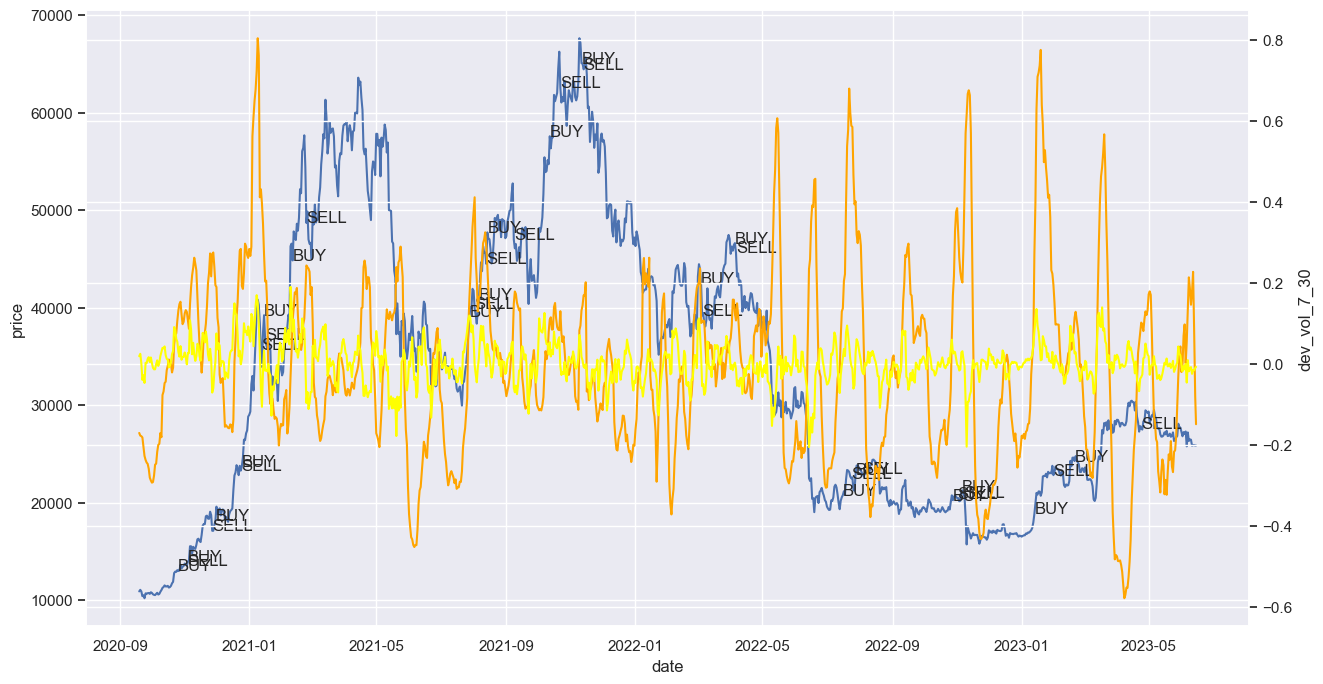

In [472]:
# plot cleaned up trade recos and indicators for a given number of points from the tail
num_points=1000

sns.lineplot(x='date', y='price',
             data=btc_historical_prices[['date','price','price_sma_30']].tail(num_points),color='b')


for index, row in btc_historical_prices.tail(num_points).iterrows():
    if (row['trade_reco'] != None):
        plt.text(row['date'], row['price'], row['trade_reco']) # doing this after declaring 2nd axis throws error!
        
ax2=plt.twinx() 
sns.lineplot(x='date', y='dev_vol_7_30',
              data=btc_historical_prices[['date','dev_vol_7_30','dev_price_sma_30']].tail(num_points),color='orange',ax=ax2)

sns.lineplot(x='date', y='dev_price_sma_7',
              data=btc_historical_prices[['date','dev_price_sma_7']].tail(num_points),color='yellow',ax=ax2)

<Axes: xlabel='date', ylabel='dev_vol_7_30'>

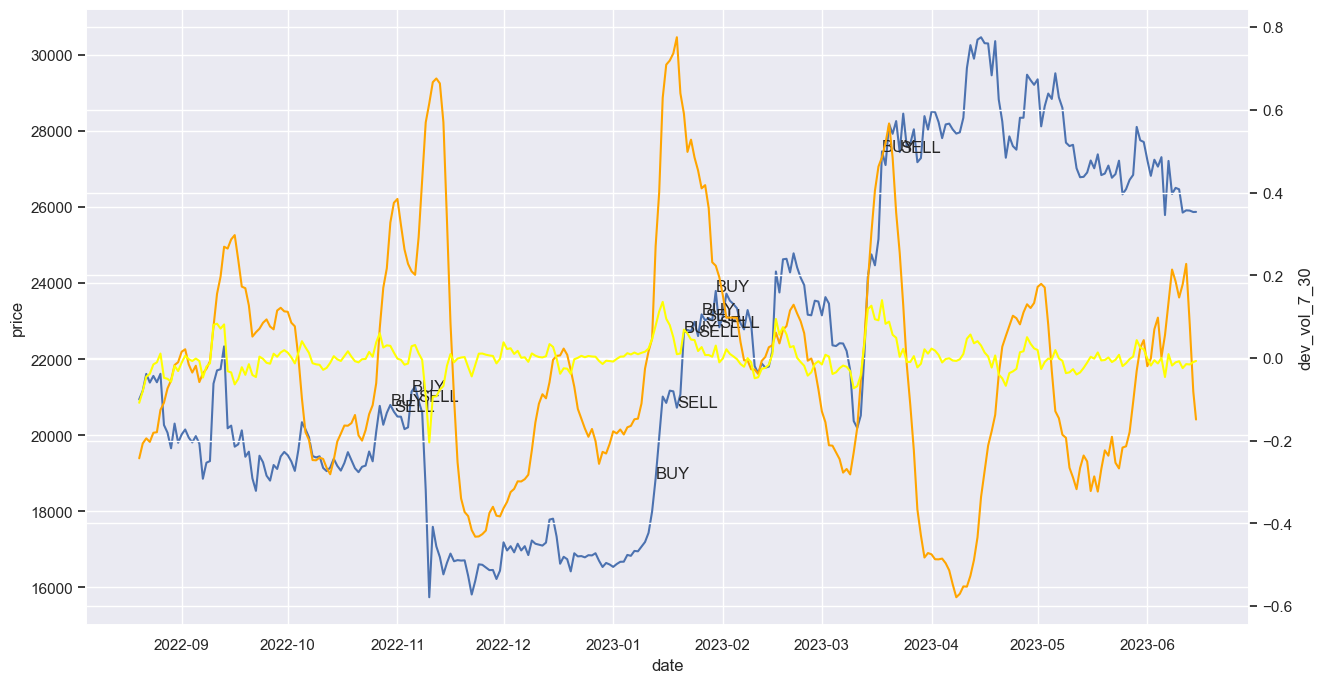

In [499]:
# plot cleaned up trade recos and indicators for a given number of points from the tail
num_points=300

sns.lineplot(x='date', y='price',
             data=btc_historical_prices[['date','price','price_sma_30']].tail(num_points),color='b')


for index, row in btc_historical_prices.tail(num_points).iterrows():
    if (row['trade_reco'] != None):
        plt.text(row['date'], row['price'], row['trade_reco']) # doing this after declaring 2nd axis throws error!
        
ax2=plt.twinx() 
sns.lineplot(x='date', y='dev_vol_7_30',
              data=btc_historical_prices[['date','dev_vol_7_30','dev_price_sma_30']].tail(num_points),color='orange',ax=ax2)

sns.lineplot(x='date', y='dev_price_sma_7',
              data=btc_historical_prices[['date','dev_price_sma_7']].tail(num_points),color='yellow',ax=ax2)

## <font color='blue'> Algo improvement notes on 18 June 2023 </font>

* these will go into improving algo later. noting so that I dont forget* 

#### Adding a 7 day price signal to improve buy signal 
At the moment, I am only using 7 vs 30 day vol and price deviations as signals
a problem with that is that sometimes I am catching the peak of a down trend, to fix, this I can try using 
7 day price vs current price as a signal, if its negative dont give a buy signal, etc. At the moment, not doing this, as
I am going to cover this in the sell signal. But will revisit in a further iteration of algo 

#### Using ML to find optimal parameters
I can parametrise the thresholds nad use ML/gradient descent to find optimal parameters that maximise certain goals like
profitablity, good sharpe ratio, low drawdowns, etc. 

#### Add trend indicators
I noted that 7 day price being consistently below 30 day price and vol remaining low is bearish trend and high consistent volume and orice is bullish trend, later I will add a trend indicator to the model as well

#### Using the swing in signals
At the moment, I am not using the fact that the 7 vs30 day volume swings widly from negative to positive at the start of a bull trend
if I can capture this mathematically in my algo, *it seems to reliably predict an upcoing upswing*



## <font color='blue'> Algo improvement notes 19 June 2023  </font>
1. As seen in above and below plots some trades are very short duration trades and dont seem particularly helpful, I will find a way to not identify those trades. Others actually seem rather good
2. Actually the signals are very numerous and not always in the right direction, I need to spend more time to make the signals less noise and more value before proceeding 


### <font color='green'>Refining the Algo </font>

In [ ]:
Points to improve upon
1. Missing the big moves sometimes! like really big moves 
2. very short trades 
3. 

2913.9091684672244 13476.229827280175 1056.232065881295
17875.3 18374.7 12.485000000000037


<Axes: xlabel='date', ylabel='dev_vol_7_30'>

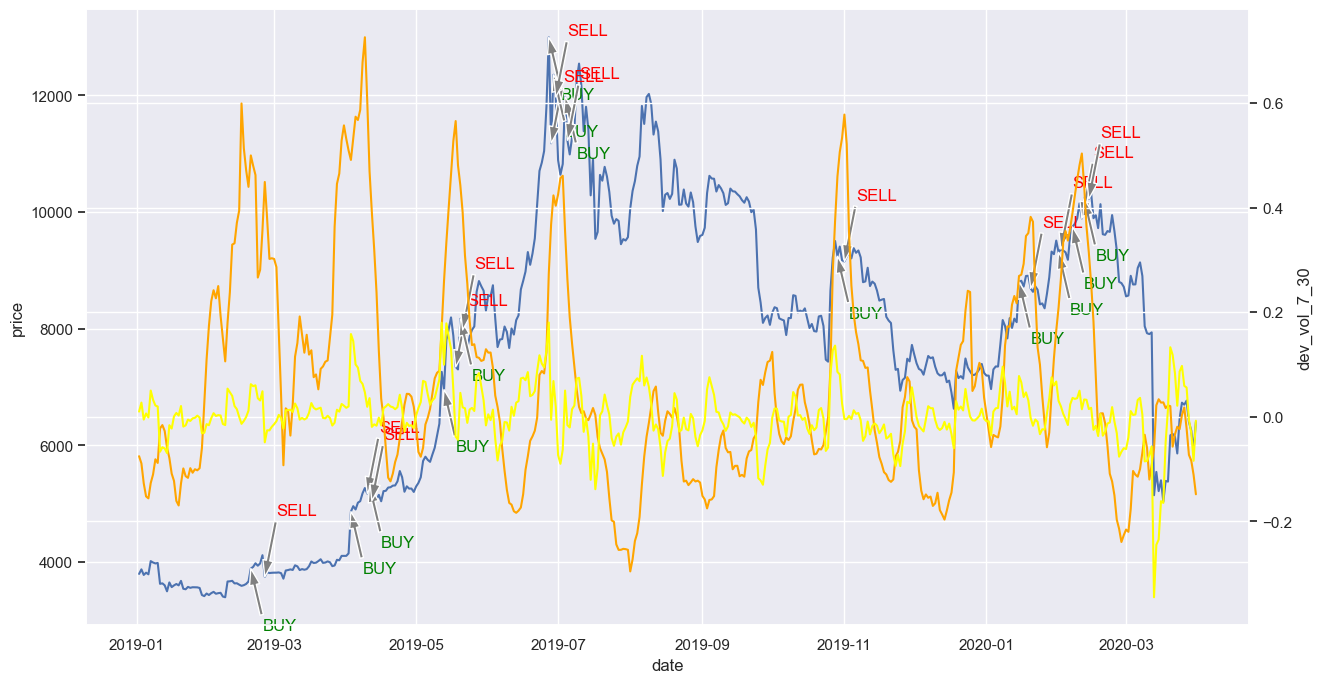

In [505]:
# plot trade recos and indicators for a given date range

from_date= '2019-01-01' #datetime.datetime(2021, 1, 1)
to_date= '2020-04-01' #datetime.datetime(2022, 7, 1) #https://www.w3schools.com/python/gloss_python_date_create.asp creating datetime objects

plot_data=btc_historical_prices[(btc_historical_prices['date']>from_date) & (btc_historical_prices['date']<to_date) ]

sns.lineplot(x='date', y='price',
             data=plot_data[['date','price','price_sma_30']],color='b')
# setting the x and y offset 
(y_lim1,y_lim2)=plt.ylim()
y_off= 0.1* (y_lim2-y_lim1)
print (y_lim1, y_lim2,y_off)

(x_lim1,x_lim2)=plt.xlim()
x_off= 0.025* (x_lim2-x_lim1)
print (x_lim1, x_lim2,x_off)

for index, row in plot_data.iterrows():
    if (row['trade_reco'] == 'BUY'):
        #plt.text(row['date'], row['price'], row['trade_reco'])
        plt.annotate(row['trade_reco'],xy=(row['date'], row['price']),xytext=((row['date']+dt.timedelta(days=5), (row['price']-y_off))),
                     color='green', arrowprops=dict(facecolor='grey', width=2.5,headwidth=7.5))
    elif (row['trade_reco'] == 'SELL'):
        plt.annotate(row['trade_reco'],xy=(row['date'], row['price']),xytext=((row['date']+dt.timedelta(days=5), (row['price']+y_off))),
                     color='red', arrowprops=dict(facecolor='grey', width=2.5,headwidth=7.5))



# #command / to comment out a block of code
ax2=plt.twinx() 
sns.lineplot(x='date', y='dev_vol_7_30',
              data=plot_data[['date','dev_vol_7_30','dev_price_sma_30']],color='orange',ax=ax2)


sns.lineplot(x='date', y='dev_price_sma_7',
              data=plot_data[['date','dev_price_sma_7']],color='yellow',ax=ax2)

#useful links for text annotations on plot
# https://www.geeksforgeeks.org/how-to-add-text-to-matplotlib/ 
# https://www.geeksforgeeks.org/how-to-annotate-matplotlib-scatter-plots/
# for adding a time delta
# https://stackoverflow.com/questions/61153546/addition-subtraction-of-integers-and-integer-arrays-with-timestamp-is-no-longer 




### Looking at vol signals

3248.6468630232553 13460.28993706322 1021.1643074039965
17944.85 18212.15 6.682500000000073


<Axes: xlabel='date', ylabel='dev_vol_7_30'>

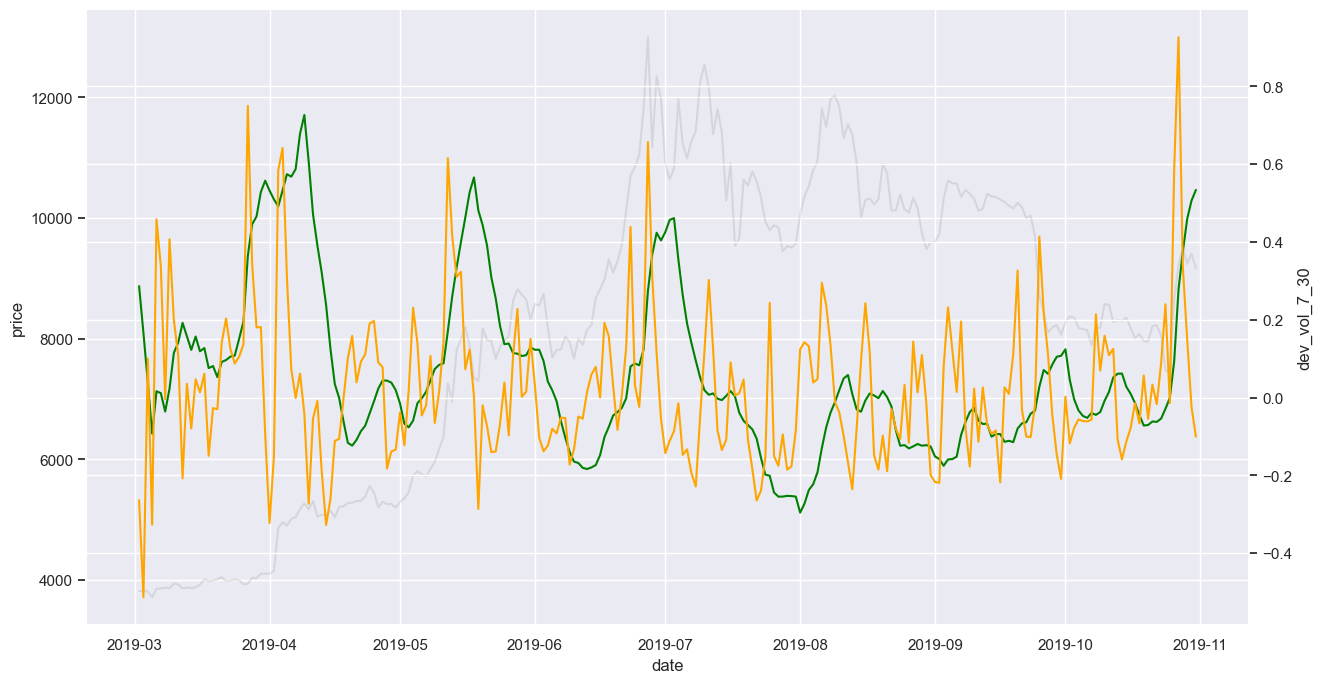

In [510]:
# plot price and vol indicators 

from_date= '2019-03-01' #datetime.datetime(2021, 1, 1)
to_date= '2019-11-01' #datetime.datetime(2022, 7, 1) #https://www.w3schools.com/python/gloss_python_date_create.asp creating datetime objects

plot_data=btc_historical_prices[(btc_historical_prices['date']>from_date) & (btc_historical_prices['date']<to_date) ]

sns.lineplot(x='date', y='price',
                 data=plot_data[['date','price','price_sma_30']],color='black', alpha=0.085)
# setting the x and y offset 
(y_lim1,y_lim2)=plt.ylim()
y_off= 0.1* (y_lim2-y_lim1)
print (y_lim1, y_lim2,y_off)

(x_lim1,x_lim2)=plt.xlim()
x_off= 0.025* (x_lim2-x_lim1)
print (x_lim1, x_lim2,x_off)


# #command / to comment out a block of code
ax2=plt.twinx() 
sns.lineplot(x='date', y='dev_vol_7_30',
              data=plot_data[['date','dev_vol_7_30','dev_price_sma_30']],color='green',ax=ax2)


sns.lineplot(x='date', y='dev_vol_sma_7',
              data=plot_data[['date','dev_vol_sma_7']],color='orange',ax=ax2)

8510.024633823512 19595.40511258133 1108.538047875782
18405.95 18605.05 4.977499999999964


<Axes: xlabel='date', ylabel='dev_vol_7_30'>

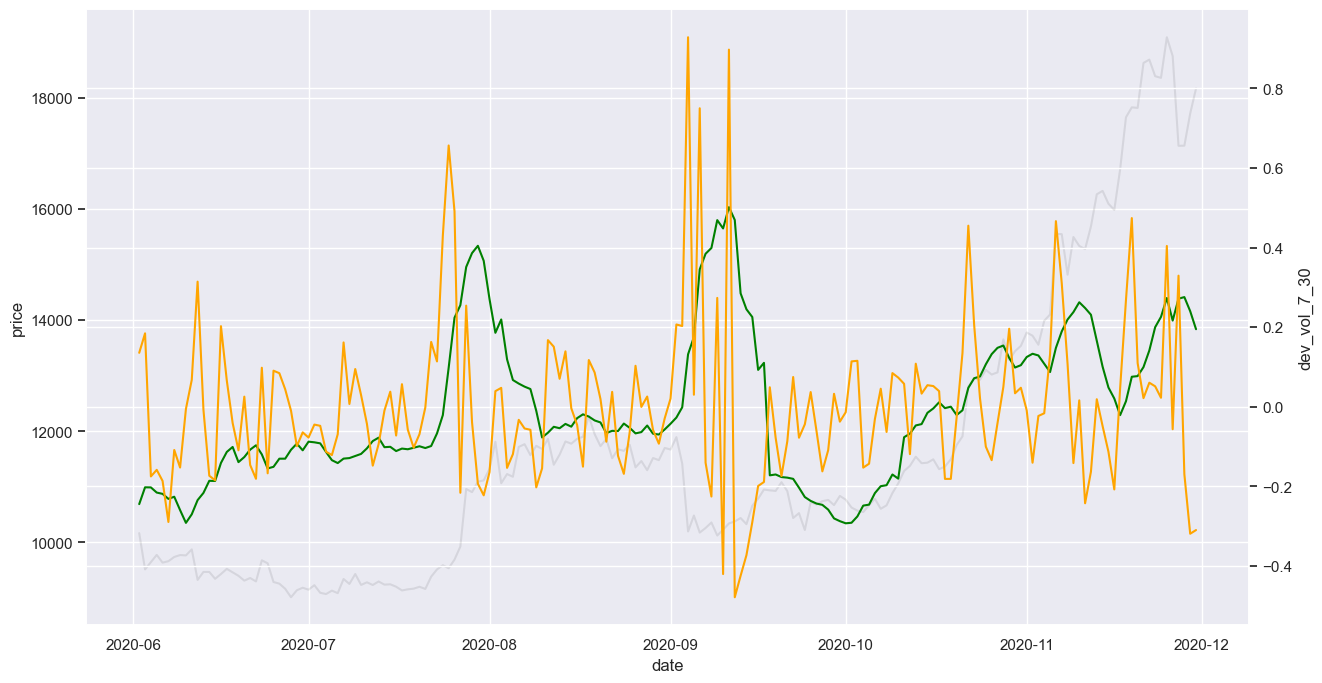

In [532]:
# plot price and vol indicators 

from_date= '2020-06-01' #datetime.datetime(2021, 1, 1)
to_date= '2020-12-01' #datetime.datetime(2022, 7, 1) #https://www.w3schools.com/python/gloss_python_date_create.asp creating datetime objects

plot_data=btc_historical_prices[(btc_historical_prices['date']>from_date) & (btc_historical_prices['date']<to_date) ]

sns.lineplot(x='date', y='price',
                 data=plot_data[['date','price','price_sma_30']],color='black', alpha=0.085)
# setting the x and y offset 
(y_lim1,y_lim2)=plt.ylim()
y_off= 0.1* (y_lim2-y_lim1)
print (y_lim1, y_lim2,y_off)

(x_lim1,x_lim2)=plt.xlim()
x_off= 0.025* (x_lim2-x_lim1)
print (x_lim1, x_lim2,x_off)


# #command / to comment out a block of code
ax2=plt.twinx() 
sns.lineplot(x='date', y='dev_vol_7_30',
              data=plot_data[['date','dev_vol_7_30','dev_price_sma_30']],color='green',ax=ax2)


sns.lineplot(x='date', y='dev_vol_sma_7',
              data=plot_data[['date','dev_vol_sma_7']],color='orange',ax=ax2)

## <font color ='green' >Observations from above graphs and next steps </font>

1. dev vol 7 vs 30 is too laggy and a threshold is not the best way to capture the start of a trend, as it is often pretty low right before the start of the next up move. This means that by the time, I check for vol>0.2 it had already had moved quite a lot from its lows so I need to capture it earlier

2. One way to do it would be to look at the rate of change/ signs of trend reversal/beginning of a spike in dev_vol_sma_7. this is a pretty good indicator of start of price run up. Although it does peak quite a lot and quite vigorously. I will need to find additional indicators that confirm the bull trend so that we dont catch every day of high vol as a buy signal

3. Duration a visual inspection showed that most of these spikes are actually just 1 or 2 day long, so I can  just check dev_vol_sma_7 on d-1 vs D, and when its above a threshold, I would have detected a peak change in volume

4. Other indicators of bull signal 
    a) dev_7_30 is always on the up move although it stays higher even when the pricedrop starts. We can use this as an additional signal to sell IF it starts trending down. THIS should actually be a check on BUY signal as well, to double check that vol spike is not due to a downtrend

6. Spotting the sell off/price drop
    b) when dev_vol_7_30 is in downtrend it is definitely going down, so definitely a SELL signal 
    c) It seems like there is a spike in dev_vol_Sma_7 even at the start of the price dump, although I will need to confirm this more rigourously
 

5. testing in other time periods 

### MIsc observations
1. for larger more sustained peaks, we just have more spikes for e.g. 2-3 spikes in a really big run up 
2. size of move 

Price Signals 


### Looking at price signals

8510.024633823512 19595.40511258133 1108.538047875782
18405.95 18605.05 4.977499999999964


<Axes: xlabel='date', ylabel='dev_price_sma_7'>

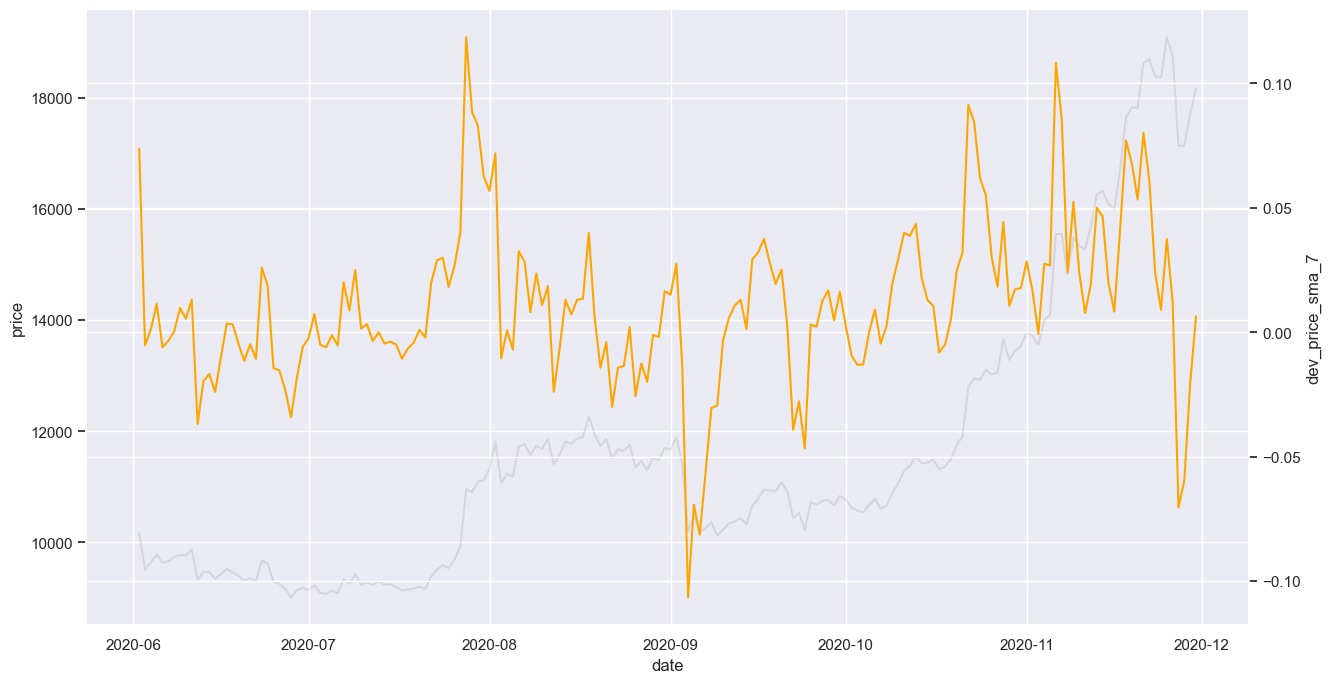

In [538]:
# plot price and vol indicators 

from_date= '2020-06-01' #datetime.datetime(2021, 1, 1)
to_date= '2020-12-01' #datetime.datetime(2022, 7, 1) #https://www.w3schools.com/python/gloss_python_date_create.asp creating datetime objects

plot_data=btc_historical_prices[(btc_historical_prices['date']>from_date) & (btc_historical_prices['date']<to_date) ]

sns.lineplot(x='date', y='price',
                 data=plot_data[['date','price','price_sma_30']],color='black', alpha=0.085)
# setting the x and y offset 
(y_lim1,y_lim2)=plt.ylim()
y_off= 0.1* (y_lim2-y_lim1)
print (y_lim1, y_lim2,y_off)

(x_lim1,x_lim2)=plt.xlim()
x_off= 0.025* (x_lim2-x_lim1)
print (x_lim1, x_lim2,x_off)


# #command / to comment out a block of code
ax2=plt.twinx() 
# sns.lineplot(x='date', y='dev_price_7_30',
#               data=plot_data[['date','dev_price_7_30','dev_price_sma_30']],color='green',ax=ax2)


sns.lineplot(x='date', y='dev_price_sma_7',
              data=plot_data[['date','dev_price_sma_7']],color='orange',ax=ax2)

3248.6468630232553 13460.28993706322 1021.1643074039965
17944.85 18212.15 6.682500000000073


<Axes: xlabel='date', ylabel='dev_price_sma_7'>

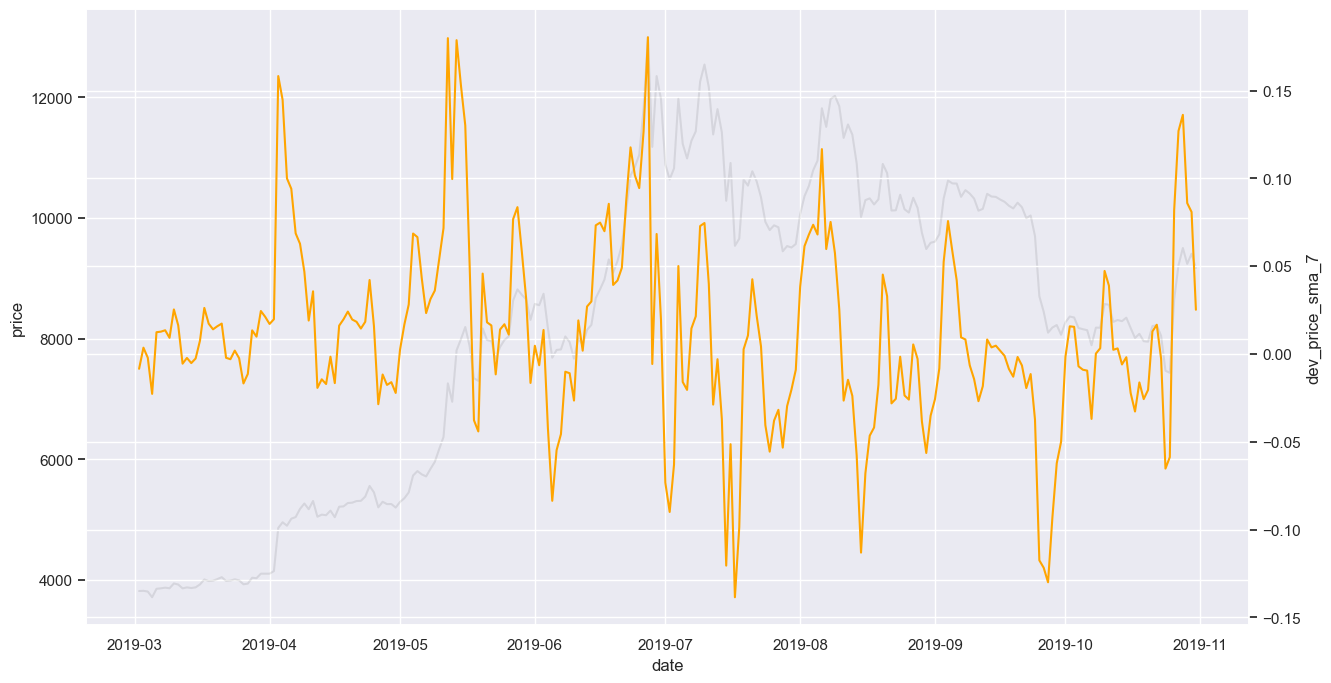

In [539]:
# plot price and vol indicators 

from_date= '2019-03-01' #datetime.datetime(2021, 1, 1)
to_date= '2019-11-01' #datetime.datetime(2022, 7, 1) #https://www.w3schools.com/python/gloss_python_date_create.asp creating datetime objects

plot_data=btc_historical_prices[(btc_historical_prices['date']>from_date) & (btc_historical_prices['date']<to_date) ]

sns.lineplot(x='date', y='price',
                 data=plot_data[['date','price','price_sma_30']],color='black', alpha=0.085)
# setting the x and y offset 
(y_lim1,y_lim2)=plt.ylim()
y_off= 0.1* (y_lim2-y_lim1)
print (y_lim1, y_lim2,y_off)

(x_lim1,x_lim2)=plt.xlim()
x_off= 0.025* (x_lim2-x_lim1)
print (x_lim1, x_lim2,x_off)


# #command / to comment out a block of code
ax2=plt.twinx() 
# sns.lineplot(x='date', y='dev_price_7_30',
#               data=plot_data[['date','dev_price_7_30','dev_price_sma_30']],color='green',ax=ax2)


sns.lineplot(x='date', y='dev_price_sma_7',
              data=plot_data[['date','dev_price_sma_7']],color='orange',ax=ax2)

## <font color ='green' >Observations from above graphs and next steps </font>

1. when dev_price_7_30 is in a dwontrend, then its not a good idea to buy/hold. i.e. SELL if dev_price_7_30 is detected in a downtrend. Ahtough, it shouldnt be the only indicator I think Other than this, there is not much that could be deduced from this signal
2. dev_price_7 is actually much more useful as it varies quite a bit
    a) It also changes course, and just being or above a threshold, is not a reliable indicator, instead it changing course/trend reversal is a more reliable indicator of upcoming price run-up 
    b) when it is positive, it is usually a price run-up so it can definitely be an either/or check between trend reversal OR it being positive as a signal to 'BUY'
    c) when it drops below zero, then definitely a SELL signal, however, there may be more signals for this
3. Note that the range for this idnicator is much smaller than the vol idnicators, 15 is very large move and 5 is a pretty big move as well

# to be investigated still 
size of peaks?
length of peaks?

In [527]:
plot_data[(plot_data.date>='2019-05-01') & (plot_data.date<='2019-06-01')]

date        price    market_cap        volume coin  price_sma_7   
1993 2019-05-01  5292.803975  9.353408e+10  1.679487e+10  btc  5279.768244  \
1994 2019-05-02  5354.586800  9.457989e+10  1.456641e+10  btc  5265.837536   
1995 2019-05-03  5450.706620  9.638961e+10  1.651262e+10  btc  5301.211539   
1996 2019-05-04  5731.493100  1.011759e+11  2.000629e+10  btc  5363.446651   
1997 2019-05-05  5803.943309  1.026530e+11  1.924284e+10  btc  5441.584580   
1998 2019-05-06  5749.323780  1.017647e+11  1.618406e+10  btc  5511.801799   
1999 2019-05-07  5715.757136  1.011015e+11  1.681122e+10  btc  5585.516389   
2000 2019-05-08  5841.053771  1.039825e+11  1.940827e+10  btc  5663.837788   
2001 2019-05-09  5957.856733  1.052718e+11  1.667241e+10  btc  5750.019207   
2002 2019-05-10  6168.268996  1.092843e+11  1.840140e+10  btc  5852.528118   
2003 2019-05-11  6370.233759  1.126846e+11  2.080184e+10  btc  5943.776784   
2004 2019-05-12  7258.261281  1.293237e+11  3.248004e+10  btc  6151.536494   
2005 2019-05-13  6953.751389  1.228269e+11  3.154533e+10  btc  6323.597581   
2006 2019-05-14  7805.981649  1.380898e+11  3.207804e+10  btc  6622.201083   
2007 2019-05-15  7990.055554  1.413411e+11  3.542612e+10  btc  6929.201337   
2008 2019-05-16  8192.223139  1.446156e+11  3.089371e+10  btc  7248.396538   
2009 2019-05-17  7875.913200  1.395254e+11  3.502695e+10  btc  7492.345710   
2010 2019-05-18  7343.371457  1.301232e+11  3.303015e+10  btc  7631.365381   
2011 2019-05-19  7300.655158  1.292700e+11  2.247877e+10  btc  7637.421649   
2012 2019-05-20  8168.730690  1.445975e+11  3.074768e+10  btc  7810.990121   
2013 2019-05-21  7976.851713  1.411098e+11  2.862148e+10  btc  7835.400130   
2014 2019-05-22  7958.365526  1.410167e+11  2.531434e+10  btc  7830.872983   
2015 2019-05-23  7665.796854  1.359131e+11  2.458988e+10  btc  7755.669228   
2016 2019-05-24  7861.812792  1.394952e+11  2.534506e+10  btc  7753.654884   
2017 2019-05-25  7977.244882  1.413568e+11  2.736846e+10  btc  7844.208231   
2018 2019-05-26  8037.627432  1.423014e+11  2.397834e+10  btc  7949.489984   
2019 2019-05-27  8631.080578  1.527790e+11  2.922440e+10  btc  8015.539968   
2020 2019-05-28  8816.033915  1.563515e+11  3.313684e+10  btc  8135.423140   
2021 2019-05-29  8726.978110  1.547064e+11  2.733599e+10  btc  8245.224938   
2022 2019-05-30  8650.677406  1.531907e+11  2.821489e+10  btc  8385.922159   
2023 2019-05-31  8310.891063  1.475289e+11  3.329524e+10  btc  8450.076198   
2024 2019-06-01  8575.646353  1.520373e+11  3.032934e+10  btc  8535.562122   

      price_sma_30  price_sma_90  price_sma_180     vol_sma_7  ...   
1993   5158.046516   4262.266381    4242.246092  1.745519e+10  ...  \
1994   5198.322012   4283.629082    4236.296899  1.660203e+10  ...   
1995   5217.937885   4305.698154    4231.088659  1.619961e+10  ...   
1996   5243.793261   4330.641615    4227.646610  1.625308e+10  ...   
1997   5273.957320   4356.751809    4224.249387  1.687688e+10  ...   
1998   5298.436251   4382.144257    4220.218701  1.696416e+10  ...   
1999   5320.899187   4407.098284    4215.446234  1.715976e+10  ...   
2000   5343.035050   4434.156250    4211.838451  1.753310e+10  ...   
2001   5366.067115   4462.643384    4209.305532  1.783396e+10  ...   
2002   5399.270239   4490.465461    4207.852034  1.810378e+10  ...   
2003   5434.647842   4520.496855    4207.496196  1.821743e+10  ...   
2004   5508.330112   4560.303184    4212.201239  2.010846e+10  ...   
2005   5570.706320   4597.217705    4215.309362  2.230293e+10  ...   
2006   5661.806136   4643.573445    4226.516968  2.448390e+10  ...   
2007   5756.497504   4692.240037    4239.314271  2.677217e+10  ...   
2008   5861.575575   4743.379607    4253.660198  2.880378e+10  ...   
2009   5950.319402   4790.876096    4266.308652  3.117886e+10  ...   
2010   6021.133213   4832.218094    4275.778152  3.292576e+10  ...   
2011   6088.662817   4872.613423    4289.175137  3.149701e+10  ...   
2012   6184.942026   4920.193540    

In [ ]:
# plot price and price indicators 

# <font color='red'>To Dos </font>
As a learning point from the above epxdrience,
1. I will do a pandas tutorial, perhaps the 10 mins to pandas and/or the data camp tutorial and/or the public student data set notebook + specially focuse on fetching, setting, iterating and creating a dataframe
+ notes onthe same to make the most of this experience. 
2. do a proper seaborn tutorial
3. quickly revise python course
Later these will help me become a better programmer and I might even re-write the current algo at a higher level.
However, I will finish visualising a basic version of the algo first!

## # <font color='orange'>To Do Later for code improvement and learning </font>
 
1. i should add exception handling and make my code robust against edge cases like invalid date, start/end of arrays etc. 
2. but now i must focus on getting a version up and ready first 
3. I could re-write create_trade using recursion 
4. I could understand what unit testing is and do a bunch of it in my code 

In [ ]:
## display buy signals

In [ ]:
## calculate sell signals

In [ ]:
## display sell signals

In [ ]:
## encapsulate in a function

In [ ]:
### run the signal function for all dates in teh data set and store the results

In [ ]:
### visualise the buy/sell/do nothing signals on the graph 

In [ ]:
### backtest and calculate performance

In [ ]:
### Iterate a bit more as required 

In [ ]:
##add trend signals, try ML, and other suggestions noted above in ideas for further algo###

In [ ]:
### connect with the Kraken API 

In [ ]:
### understand basic concepts of trading and using the Krakent API (see One note)

In [ ]:
### buy 10 USD bitcoin from code using Kraken API and confirm in the UX 

# <font color='purple'> Rough Work </font>

In [ ]:
# testing create_trade

In [387]:
isBuyorSell('2014-01-04')

'BUY'

In [388]:
isBuyorSell('2014-01-07')

'SELL'

In [415]:
create_trade('2014-01-04')

breaking now


Timestamp('2014-01-07 00:00:00')

In [416]:
create_trade('2014-01-11')

breaking now


Timestamp('2014-01-12 00:00:00')

In [417]:
create_trade('2014-04-20') # create date seems to be working okay 

breaking now


Timestamp('2014-06-07 00:00:00')

In [409]:
buy_date='2014-04-20'
type(buy_date)

str

In [412]:
 if(type(buy_date)==str):
        buy_date=datetime.datetime.strptime(buy_date, format)
        print('in the loop')

in the loop


In [372]:
if (isBuyorSell('2014-01-07')=='SELL'):
    btc_historical_prices.loc[btc_historical_prices.date ==date,'trade_reco'] ='SELL'
    sell_date=date
    print('breaking now')
else :
    print ('not found')
        


breaking now


In [ ]:
btc_historical_prices['date','signal','trade_reco']

In [254]:
 btc_historical_prices.loc[btc_historical_prices.date =='2022-07-01','trade_reco']='TEMP'

In [255]:
btc_historical_prices[btc_historical_prices.date=='2022-07-01']

date         price    market_cap        volume coin  price_sma_7   
3150 2022-07-01  19608.397493  3.659842e+11  2.281652e+10  btc  20656.04946  \

      price_sma_30  price_sma_90  price_sma_180     vol_sma_7  ...   
3150   24392.97259  32373.806914     36845.0826  1.899170e+10  ...  \

      dev_price_sma_180  dev_vol_sma_7  dev_vol_sma_30  dev_vol_sma_90   
3150          -0.467815       0.201394       -0.163887       -0.190246  \

      dev_vol_sma_180  temp_signal  dev_vol_7_30  signal  dev_price_7_30   
3150        -0.118818         None     -0.304047    TEMP       -0.153197  \

      trade_reco  
3150        TEMP  

[1 rows x 26 columns]

In [236]:
btc_historical_prices[btc_historical_prices.date=='2014-01-04']['signal']

51    BUY
Name: signal, dtype: object

In [400]:
btc_historical_prices.loc[btc_historical_prices['signal']=='SELL'].head(50)

date       price    market_cap        volume coin  price_sma_7   
54  2014-01-07  826.500000  1.010768e+10  8.026810e+07  btc   842.452857  \
55  2014-01-08  838.320000  1.025634e+10  7.806030e+07  btc   852.535714   
56  2014-01-09  853.290000  1.044391e+10  5.881360e+07  btc   864.072857   
57  2014-01-10  863.300000  1.057044e+10  2.976360e+07  btc   869.477143   
59  2014-01-12  867.450000  1.063019e+10  4.017110e+07  btc   870.137143   
60  2014-01-13  840.960000  1.030931e+10  4.295050e+07  btc   856.505714   
61  2014-01-14  838.050000  1.027690e+10  2.346940e+07  btc   858.155714   
62  2014-01-15  860.440000  1.055540e+10  2.860040e+07  btc   861.315714   
63  2014-01-16  837.980000  1.028390e+10  1.871970e+07  btc   859.128571   
64  2014-01-17  812.900000  9.979242e+09  3.926600e+07  btc   851.928571   
86  2014-02-08  701.610000  8.678267e+09  8.694040e+07  btc   791.582857   
87  2014-02-09  672.070000  8.315657e+09  3.486440e+07  btc   768.105714   
88  2014-02-10  689.650000  8.535557e+09  3.852740e+07  btc   750.430000   
89  2014-02-11  697.760000  8.638932e+09  1.218840e+08  btc   731.201429   
90  2014-02-12  655.260000  8.115968e+09  6.597040e+07  btc   706.107143   
91  2014-02-13  651.910000  8.077475e+09  1.910910e+07  btc   684.225714   
92  2014-02-14  623.570000  7.729135e+09  9.091760e+07  btc   670.261429   
93  2014-02-15  644.100000  7.986582e+09  5.735080e+07  btc   662.045714   
94  2014-02-16  613.850000  7.614456e+09  2.410490e+07  btc   653.728571   
95  2014-02-17  645.140000  8.005429e+09  4.851610e+07  btc   647.370000   
96  2014-02-18  625.010000  7.758140e+09  2.206640e+07  btc   636.977143   
98  2014-02-20  593.890000  7.377406e+09  3.574340e+07  btc   623.792857   
104 2014-02-26  567.250000  7.061199e+09  7.503930e+07  btc   571.374286   
106 2014-02-28  567.200000  7.065922e+09  2.464900e+07  btc   568.065714   
107 2014-03-01  560.110000  6.979713e+09  2.290380e+07  btc   566.501429   
134 2014-03-28  503.661000  6.331497e+09  7.957160e+07  btc   562.672857   
135 2014-03-29  502.302000  6.317113e+09  2.681090e+07  btc   554.256000   
136 2014-03-30  469.938000  5.912149e+09  1.786780e+07  btc   540.278714   
137 2014-03-31  457.399000  5.756309e+09  5.683850e+07  btc   523.990286   
138 2014-04-01  478.716300  6.023351e+09  3.568580e+07  btc   509.156900   
139 2014-04-02  437.515000  5.506314e+09  4.964760e+07  btc   488.167329   
140 2014-04-03  447.082200  5.604036e+09  4.076550e+07  btc   470.944786   
141 2014-04-04  448.879200  5.641613e+09  2.292550e+07  btc   463.118814   
205 2014-06-07  651.708300  8.428207e+09  1.295415e+07  btc   651.937371   
206 2014-06-08  649.898300  8.445490e+09  6.819174e+06  btc   653.328314   
232 2014-07-04  627.128800  8.140822e+09  2.241816e+07  btc   627.224300   
233 2014-07-05  627.581300  8.149049e+09  9.292052e+06  btc   631.897100   
234 2014-07-06  631.002500  8.195697e+09  1.118721e+07  btc   636.541986   
242 2014-07-14  618.205027  8.034625e+09  2.646077e+09  btc   623.639478   
243 2014-07-15  618.952500  8.044340e+09  1.077637e+07  btc   623.483049   
244 2014-07-16  614.147500  7.981891e+09  1.367905e+07  btc   622.624121   
245 2014-07-17  622.895000  8.095579e+09  1.463745e+07  btc   623.733763   
248 2014-07-20  620.513800  8.093610e+09  4.767570e+06  btc   621.129847   
272 2014-08-13  543.667500  7.142146e+09  3.664467e+07  btc   577.027845   
273 2014-08-14  503.708800  6.619439e+09  4.626562e+07  btc   565.100080   
274 2014-08-15  492.284498  6.470895e+09  3.112341e+07  btc   551.011112   
275 2014-08-16  521.046300  6.851511e+09  2.794138e+07  btc   541.430890   
276 2014-08-17  494.781300  6.508254e+09  2.859611e+07  btc   528.042435   
277 2014-08-18  459.886300  6.051494e+09  6.075848e+07  btc   511.825292   
278 2014-08-19  484.155000  6.373126e+09  4.517328e+07  btc   499.932814   

     price_sma_30  price_sma_90  price_sma_180     vol_sma_7  ...   
54     772.995333           NaN            NaN  5.172427e+07  ..

In [401]:
btc_historical_prices.loc[btc_historical_prices['signal']=='BUY'].head(20)

date     price    market_cap        volume coin  price_sma_7   
51  2014-01-04  849.1400  1.035095e+10  3.634470e+07  btc   779.575714  \
52  2014-01-05  919.4100  1.120754e+10  6.241460e+07  btc   807.138571   
53  2014-01-06  936.3800  1.141440e+10  8.858460e+07  btc   832.261429   
58  2014-01-11  905.7200  1.109459e+10  4.829950e+07  btc   877.560000   
157 2014-04-20  497.3177  6.312897e+09  1.210310e+07  btc   496.917143   
187 2014-05-20  483.4167  6.214911e+09  5.941545e+07  btc   450.145000   
188 2014-05-21  488.7717  6.294422e+09  2.012594e+07  btc   456.505714   
189 2014-05-22  522.6083  6.716605e+09  2.875840e+07  btc   467.699757   
190 2014-05-23  524.4750  6.662964e+09  3.025334e+07  btc   479.029757   
191 2014-05-24  523.1083  6.727963e+09  1.023639e+07  btc   490.066186   
192 2014-05-25  569.3767  7.325372e+09  4.376238e+07  btc   507.946671   
193 2014-05-26  579.6217  7.479335e+09  2.617459e+07  btc   527.339771   
194 2014-05-27  569.4750  7.325147e+09  3.305921e+07  btc   539.633814   
195 2014-05-28  571.5533  7.402205e+09  1.573919e+07  btc   551.459757   
196 2014-05-29  565.2600  7.290261e+09  1.436299e+07  btc   557.552857   
197 2014-05-30  621.1467  7.897758e+09  4.227170e+07  btc   571.363100   
198 2014-05-31  620.5000  8.007249e+09  1.865637e+07  btc   585.276200   
199 2014-06-01  640.1617  8.094126e+09  5.356520e+07  btc   595.388343   
200 2014-06-02  656.4100  8.487587e+09  4.115374e+07  btc   606.358100   
201 2014-06-03  667.3683  8.580310e+09  3.741943e+07  btc   620.342857   

     price_sma_30  price_sma_90  price_sma_180     vol_sma_7  ...   
51     769.410667           NaN            NaN  2.920593e+07  ...  \
52     766.069000           NaN            NaN  3.426254e+07  ...   
53     770.215667           NaN            NaN  4.338647e+07  ...   
58     768.652333           NaN            NaN  6.374347e+07  ...   
157    484.981700    615.382078            NaN  3.450436e+07  ...   
187    449.929187    513.341696     660.958681  1.426588e+07  ...   
188    449.799133    512.173714     659.612135  1.617461e+07  ...   
189    451.057633    511.505473     657.963792  1.939439e+07  ...   
190    452.289300    510.987862     656.630709  2.296015e+07  ...   
191    453.250467    509.878288     655.130922  2.404505e+07  ...   
192    456.936133    509.844807     653.666737  2.917846e+07  ...   
193    461.130190    510.848270     651.808357  3.124664e+07  ...   
194    465.515303    510.872992     649.532774  2.748147e+07  ...   
195    470.003080    510.709362     646.586792  2.685479e+07  ...   
196    474.069413    510.687807     643.463514  2.479830e+07  ...   
197    479.941077    511.365992     641.173274  2.651521e+07  ...   
198    485.454700    512.023214     639.209218  2.771806e+07  ...   
199    492.010977    512.627344     636.773228  2.911846e+07  ...   
200    499.423533    512.420789     634.189506  3.125834e+07  ...   
201    507.204370    512.522214     632.402441  3.188123e+07  ...   

     dev_price_sma_180  dev_vol_sma_7  dev_vol_sma_30  dev_vol_sma_90   
51                 NaN       0.244429        2.690505             NaN  \
52                 NaN       0.821657        4.232327             NaN   
53                 NaN       1.041756        4.952678             NaN   
58                 NaN      -0.242283        0.953734             NaN   
157                NaN      -0.649230       -0.593563       -0.628661   
187          -0.268613       3.164864        3.768110        1.452610   
188          -0.259001       0.244292        0.593988       -0.163227   
189          -0.205719       0.482821        1.168956        0.210955   
190          -0.201263       0.317646        1.162940        0.268812   
191          -0.201521      -0.574283       -0.269418       -0.563706   
192          -0.128950       0.499818        2.125599        0.868303   
193          -0.110748      -0.162323        0.808408        0.164352   
194          -0.123254       0.202964        1.167750   

In [ ]:
### rough work 

## OTHER explorations (not being used at the moment)

In [ ]:
#BUBBLE PLOT (OLD) ### OLDER Plot, not using currently ###
# from https://seaborn.pydata.org/examples/scatter_bubbles.html
##sns.relplot(x='date',y='volume',hue='coin',size='price',palette='muted',height=12, data=btc_eth_historical_prices)

In [ ]:
# filtering only on btc data source: https://towardsdatascience.com/8-ways-to-filter-pandas-dataframes-d34ba585c1b8 
sns.lineplot(x='date',y='price',hue='coin',palette='muted'
             , data=btc_eth_historical_prices[btc_eth_historical_prices.coin=='btc'])

In [ ]:
sns.lineplot(x='date',y='price',hue='coin',palette='muted'
             , data=btc_eth_historical_prices[btc_eth_historical_prices.coin=='eth'])

In [ ]:
# make a wide array like before and do some ratios and plotting on 2 axes adn stuff like that 

In [ ]:
# plotting with 2 different vertical axes

In [ ]:
ax=btc_eth_historical_prices.plot(x="date",y="price")

In [ ]:
# generic function to fetch historical crypto prices into a data frame 

In [ ]:
# fetch the list of cryptos i am interested in

In [ ]:
# loop through the cryptos, fetch the prices, and aggregate in a dataframe

In [ ]:
# plot them all together 

In [ ]:
# grab an element in each row, put the date from the first one in a new dataframe, 
# and grab the price from the list, convert it to float, do the same for mcap and volume, build a row and append to 
# new dataframe 

### Volume trends for top 10 crypto over last 3 months 
**Plot a graph showing line charts of top 10 crypto currencies by trading volume for each day** 
1. Grab a set of cryptos that were in teh top 10 traded in the last 3 months at any time 
2. Plot their volume traded daily 
3. Let the size of the circle represent price of the asset (we will see if this is possible )

### PLAYING AROUND WITH GRAPHING (NEHAS CODE TO BE USED AS A BASE FOR FURTHER EXPLORATION)

In [ ]:
top_crypto_vol.plot.bar(x='symbol', y='market_cap')

In [ ]:
top_crypto_vol.plot.scatter(x='current_price', y='market_cap')

In [ ]:
top_crypto_vol.plot.line(x='current_price', y='market_cap')

## Playing around with some interesting API features

### some of these would be signals for my trading algo 

### Trending on coingecko

In [ ]:
cg.get_search_trending()

### Exchange volumes

In [ ]:
cg.get_exchanges_list()

In [ ]:
cg.get_exchanges_by_id(id="binance")

### Defi 

In [ ]:
cg.get_global_decentralized_finance_defi()

### Public companies holding crypto (known)

In [ ]:
cg.get_companies_public_treasury_by_coin_id(coin_id = "ethereum")

In [ ]:
cg.get_companies_public_treasury_by_coin_id(coin_id = "bitcoin")